#### 1. Load in data

In [1]:
# load libraries
import os
import shutil
import tarfile
import urllib.request
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import tensorflow as tf

In [2]:
# import libraries for downloading the data

import os
import glob
import urllib.request
import tarfile

# to make google colab compatible
DATA_DIR = "/content/data" # where all downloaded data will go

# where folder containing images subfolders will go
IMAGES_ROOT = os.path.join(DATA_DIR, "Images")

# where folder of annotations will go
ANNOT_ROOT  = os.path.join(DATA_DIR, "Annotation")

# create the directory if it doesn't exist yet
os.makedirs(DATA_DIR, exist_ok=True)

# download the images and annotate tars
IMAGES_URL = "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
ANNOT_URL  = "http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar"

# where to save image tar file into images folder
IMAGE_TAR_PATH = os.path.join(DATA_DIR, "images.tar")

# where to save annotation file into annotation folder
ANNOT_TAR_PATH = os.path.join(DATA_DIR, "annotation.tar")

# function to download the file
def download(url, path):
    if os.path.exists(path):
        print(f"{path} already exists, skipping download.")
        return
    print(f"Downloading {url} ...")
    urllib.request.urlretrieve(url, path)
    print("Done!\n")
# download images if not already downloaded
download(IMAGES_URL, IMAGE_TAR_PATH)
# download annotations if not already downloaded
download(ANNOT_URL, ANNOT_TAR_PATH)

# function to extarct the tar files that were downloaded
def extract(tar_path, extract_to):
    print(f"Extracting {tar_path} ...")
    with tarfile.open(tar_path) as tar:
        tar.extractall(extract_to)
    print("Done!\n")
# extracts the data if it wasn't extracted already
extract(IMAGE_TAR_PATH, DATA_DIR)
extract(ANNOT_TAR_PATH, DATA_DIR)

# to sort the breed folders
if not os.path.exists(IMAGES_ROOT):
    raise FileNotFoundError(f"{IMAGES_ROOT} not found. Check extraction paths.")

# sort the breeds alphabetically
breeds = sorted(os.listdir(IMAGES_ROOT))

# prints number of breeds
print("Number of breeds:", len(breeds))
# prints the first 10 breed names
print("First 10 breeds:", breeds[:10], "\n")

# Mapping from breed to index based on sorted order
class_to_idx = {breed: idx for idx, breed in enumerate(breeds)}

# to pair images with annotations folders properly

# lists to storey images and labels
images = []
labels = []

for breed in breeds: # to loop through each breed folder
    breed_img_dir   = os.path.join(IMAGES_ROOT, breed) # path for each image folder
    breed_annot_dir = os.path.join(ANNOT_ROOT, breed) # path for eah annotation folder

     # to list all the images for breed at the moment
    image_files = glob.glob(os.path.join(breed_img_dir, "*.jpg"))

    # for each file, extract the filename
    for img_path in image_files:
        base = os.path.splitext(os.path.basename(img_path))[0]

        # to check that annotation folder exists (latest tar format)
        annot_folder = os.path.join(breed_annot_dir, base)
        if not os.path.exists(annot_folder):
            print("Missing annotation for:", img_path)
            continue # if not missing annotation proceeds with a warning
        # if annotation, append to images and labels properly
        images.append(img_path)
        labels.append(class_to_idx[breed])

print("Total usable images:", len(images))

# an example entry
if len(images) > 0:
    print("\nExample image path:", images[0])
    print("Label index:", labels[0])
    print("Breed:", breeds[labels[0]])
else:
    print("No images were successfully paired. Check extraction paths.")


Done!

Done!

Extracting /content/data/images.tar ...


/tmp/ipython-input-3578446810.py:47: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(extract_to)


Done!

Extracting /content/data/annotation.tar ...
Done!

Number of breeds: 120
First 10 breeds: ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound'] 

Total usable images: 20580

Example image path: /content/data/Images/n02085620-Chihuahua/n02085620_4290.jpg
Label index: 0
Breed: n02085620-Chihuahua


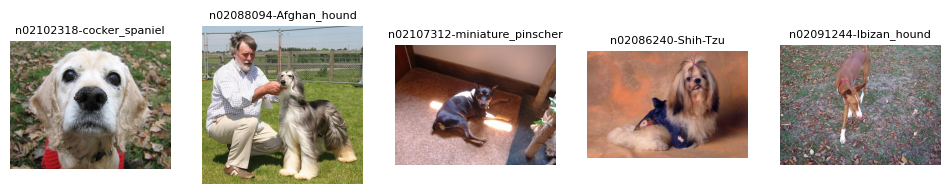

In [3]:
# code to check output of labels
import matplotlib.pyplot as plt
# import numpy to
import numpy as np
import random
from PIL import Image

# sample 5 images randomly and print image and label
sample_indices = random.sample(range(len(images)), 5)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(sample_indices):
    img = Image.open(images[idx])
    label = labels[idx]
    breed_name = breeds[label]

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(breed_name, fontsize=8)
    plt.axis('off')
plt.show()


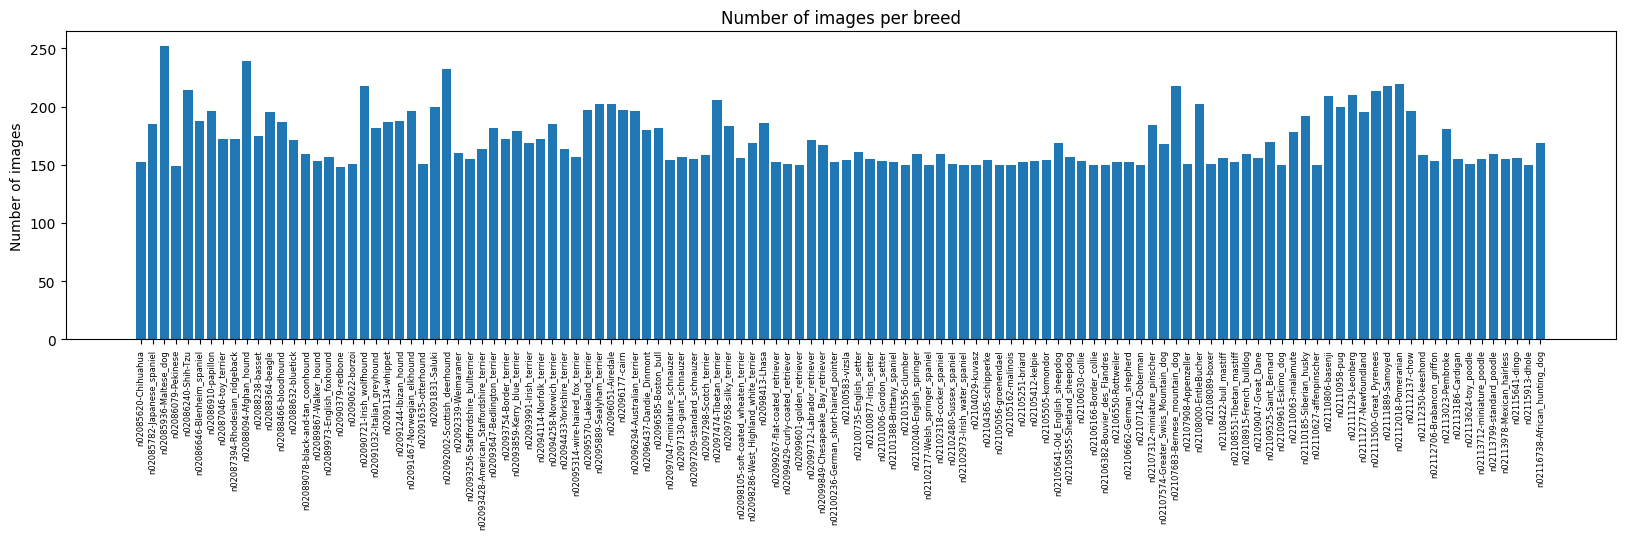

In [4]:
# see distribution of current coutns per breed / class

# get counts for each breeds
counts = [labels.count(i) for i in range(len(breeds))]

# plotting
plt.figure(figsize=(20,4))
plt.bar(range(len(breeds)), counts)
plt.xticks(range(len(breeds)), breeds, rotation=90, fontsize=6)
plt.ylabel("Number of images")
plt.title("Number of images per breed")
plt.show()

In [5]:
# to ensure there are 120 labels used
unique_labels = set(labels)
print("Number of unique labels:", len(unique_labels))
assert len(unique_labels) == len(breeds)
# assertion works and is good

Number of unique labels: 120


In [ ]:
# check a breed
  # do chiuahua since it was given in one of the ouput above
breed_to_check = "n02085620-Chihuahua"
breed_idx = class_to_idx[breed_to_check]

# get all images with this label
breed_images = [img for img, lbl in zip(images, labels) if lbl == breed_idx]

print(f"Number of images labeled {breed_to_check}: {len(breed_images)}")
print("First 5 image paths:", breed_images[:5])


Number of images labeled n02085620-Chihuahua: 152
First 5 image paths: ['/content/data/Images/n02085620-Chihuahua/n02085620_712.jpg', '/content/data/Images/n02085620-Chihuahua/n02085620_4919.jpg', '/content/data/Images/n02085620-Chihuahua/n02085620_10131.jpg', '/content/data/Images/n02085620-Chihuahua/n02085620_4602.jpg', '/content/data/Images/n02085620-Chihuahua/n02085620_4572.jpg']


In [6]:
# Decrease to 20 most frequently occurring breeds

breed_counts = []

for breed in os.listdir(IMAGES_ROOT):
    breed_path = os.path.join(IMAGES_ROOT, breed)

    # count jpg files
    n_images = sum(
        f.lower().endswith(".jpg")
        for f in os.listdir(breed_path)
    )

    breed_counts.append((breed, n_images))

# sort by freq (desc)
breed_counts.sort(key=lambda x: x[1], reverse=True)

# select top 20
selected_breeds = [breed for breed, count in breed_counts[:20]]

print("Selected breeds (top 20):")
print(selected_breeds)

# filter
breeds = selected_breeds

Selected breeds (top 20):
['n02085936-Maltese_dog', 'n02088094-Afghan_hound', 'n02092002-Scottish_deerhound', 'n02112018-Pomeranian', 'n02111889-Samoyed', 'n02107683-Bernese_mountain_dog', 'n02090721-Irish_wolfhound', 'n02086240-Shih-Tzu', 'n02111500-Great_Pyrenees', 'n02111129-Leonberg', 'n02110806-basenji', 'n02097474-Tibetan_terrier', 'n02095889-Sealyham_terrier', 'n02108000-EntleBucher', 'n02096051-Airedale', 'n02091831-Saluki', 'n02110958-pug', 'n02096177-cairn', 'n02095570-Lakeland_terrier', 'n02091467-Norwegian_elkhound']


#### 2. Conduct Data Splits

In [7]:
# import progress bar
from tqdm import tqdm
import shutil
from sklearn.model_selection import train_test_split


OUTPUT_DIR = os.path.join(DATA_DIR, "data_splits")
os.makedirs(OUTPUT_DIR, exist_ok=True)

train_dir = os.path.join(OUTPUT_DIR, "train")
val_dir = os.path.join(OUTPUT_DIR, "val")
test_dir = os.path.join(OUTPUT_DIR, "test")

for d in [train_dir, val_dir, test_dir]:
    os.makedirs(d, exist_ok=True)

# # need to sort breeds
# breeds = sorted(os.listdir(IMAGES_ROOT))


for breed in tqdm(breeds, desc="Splitting breeds"):
    breed_path = os.path.join(IMAGES_ROOT, breed)

    # all image paths for this breed
    image_files = [
        os.path.join(breed_path, f)
        for f in os.listdir(breed_path)
        if f.lower().endswith(".jpg")
    ]

    # create splits now

    # 70% train, 15% val, 15% test for splits
    train_imgs, temp_imgs = train_test_split(
        image_files, test_size=0.30, random_state=42
    )
    val_imgs, test_imgs = train_test_split(
        temp_imgs, test_size=0.50, random_state=42
    )

    # output breed folders
    for split_name, split_imgs in zip(["train", "val", "test"],
                                      [train_imgs, val_imgs, test_imgs]):

        split_breed_folder = os.path.join(OUTPUT_DIR, split_name, breed)
        os.makedirs(split_breed_folder, exist_ok=True)

        # copy images to proper split folder
        for img_path in split_imgs:
            shutil.copy(img_path, split_breed_folder)

print("Dataset split complete!")
print(f"Train directory: {train_dir}")
print(f"Val directory:   {val_dir}")
print(f"Test directory:  {test_dir}")

Splitting breeds: 100%|██████████| 20/20 [00:00<00:00, 37.59it/s]

Dataset split complete!
Train directory: /content/data/data_splits/train
Val directory:   /content/data/data_splits/val
Test directory:  /content/data/data_splits/test


In [8]:
# sanity check for decrease to 20 breeds
for split in ["train", "val", "test"]:
    breeds_in_split = sorted(os.listdir(os.path.join(OUTPUT_DIR, split)))
    print(split, len(breeds_in_split), "breeds")
    print(breeds_in_split)

train 20 breeds
['n02085936-Maltese_dog', 'n02086240-Shih-Tzu', 'n02088094-Afghan_hound', 'n02090721-Irish_wolfhound', 'n02091467-Norwegian_elkhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02095570-Lakeland_terrier', 'n02095889-Sealyham_terrier', 'n02096051-Airedale', 'n02096177-cairn', 'n02097474-Tibetan_terrier', 'n02107683-Bernese_mountain_dog', 'n02108000-EntleBucher', 'n02110806-basenji', 'n02110958-pug', 'n02111129-Leonberg', 'n02111500-Great_Pyrenees', 'n02111889-Samoyed', 'n02112018-Pomeranian']
val 20 breeds
['n02085936-Maltese_dog', 'n02086240-Shih-Tzu', 'n02088094-Afghan_hound', 'n02090721-Irish_wolfhound', 'n02091467-Norwegian_elkhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02095570-Lakeland_terrier', 'n02095889-Sealyham_terrier', 'n02096051-Airedale', 'n02096177-cairn', 'n02097474-Tibetan_terrier', 'n02107683-Bernese_mountain_dog', 'n02108000-EntleBucher', 'n02110806-basenji', 'n02110958-pug', 'n02111129-Leonberg', 'n02111500-Great_Pyrenees

In [9]:
# to double check the counts per image split
for split in ["train", "val", "test"]:
    total = sum(len(files) for _, _, files in os.walk(os.path.join(OUTPUT_DIR, split)))
    print(split, total)


train 2963
val 637
test 644


In [9]:
# check that the total number of breeds is preseved
print(len(os.listdir(train_dir)), "breeds in train")
print(len(os.listdir(val_dir)),   "breeds in val")
print(len(os.listdir(test_dir)),  "breeds in test")

# all 20 breeds in each split data

20 breeds in train
20 breeds in val
20 breeds in test


#### 3. Convert to TF Dataset for efficiency

In [10]:
# convert to pytorch dataset

import tensorflow as tf

IMG_SIZE = 224
BATCH_SIZE = 32

#split directories
OUTPUT_DIR = os.path.join(DATA_DIR, "data_splits")
train_dir = os.path.join(OUTPUT_DIR, "train")
val_dir   = os.path.join(OUTPUT_DIR, "val")
test_dir  = os.path.join(OUTPUT_DIR, "test")

# training dataset first
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode="int",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
)

# validation dataset now
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    label_mode="int",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
)

# test dataset last
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode="int",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
)


Found 2963 files belonging to 20 classes.
Found 637 files belonging to 20 classes.
Found 644 files belonging to 20 classes.


#### 4. Running ResNet 50 as is for feature extraction before adding data augmentaion.

In [13]:
#data augmentation using pytorch
from torchvision import datasets, transforms
from  keras import Sequential
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from keras.utils import set_random_seed

set_random_seed(42)


# train gets augmentations
train_data_aug_feat = train_ds.map(lambda x, y: (preprocess_input(x), y))

# validation and test only normalized
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

In [14]:
from tensorflow.keras import layers, optimizers, models
import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
# for ResNet50
from keras.applications import ResNet50
from keras.models import Model

# load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', # want to use pretrained image weights
                      include_top=False, # do not want to use original head, use custom below
                      # also allows for feature extraction
                      input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False # for feature extraction
# creating own cutstom head
X = base_model.output
X = GlobalAveragePooling2D()(X)
X = Dropout(0.3)(X)
X = Dense(128, activation='relu')(X)
X = Dropout(0.2)(X)

# need to add softmax layer for the number of classes (20 being used)
predictions = Dense(20, activation = 'softmax')(X)

# create the final model
ResNet50_model = Model(inputs = base_model.input, outputs = predictions)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [15]:
# compile the model
ResNet50_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# now fit and train the model
history = ResNet50_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20,
    verbose = 1
)

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 38s 265ms/step - accuracy: 0.3333 - loss: 2.4128 - val_accuracy: 0.8116 - val_loss: 0.5692
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.7455 - loss: 0.7812 - val_accuracy: 0.8509 - val_loss: 0.4528
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.7985 - loss: 0.6012 - val_accuracy: 0.8823 - val_loss: 0.3762
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.8380 - loss: 0.4785 - val_accuracy: 0.8744 - val_loss: 0.3675
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.8560 - loss: 0.4159 - val_accuracy: 0.8885 - val_loss: 0.3210
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.8816 - loss: 0.3386 - val_accuracy: 0.8744 - val_loss: 0.3444
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.8992 - loss: 0.3017 - val_accuracy: 0.8823 - val_loss: 0.3466
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9170 - loss: 0.2491 - val_accu

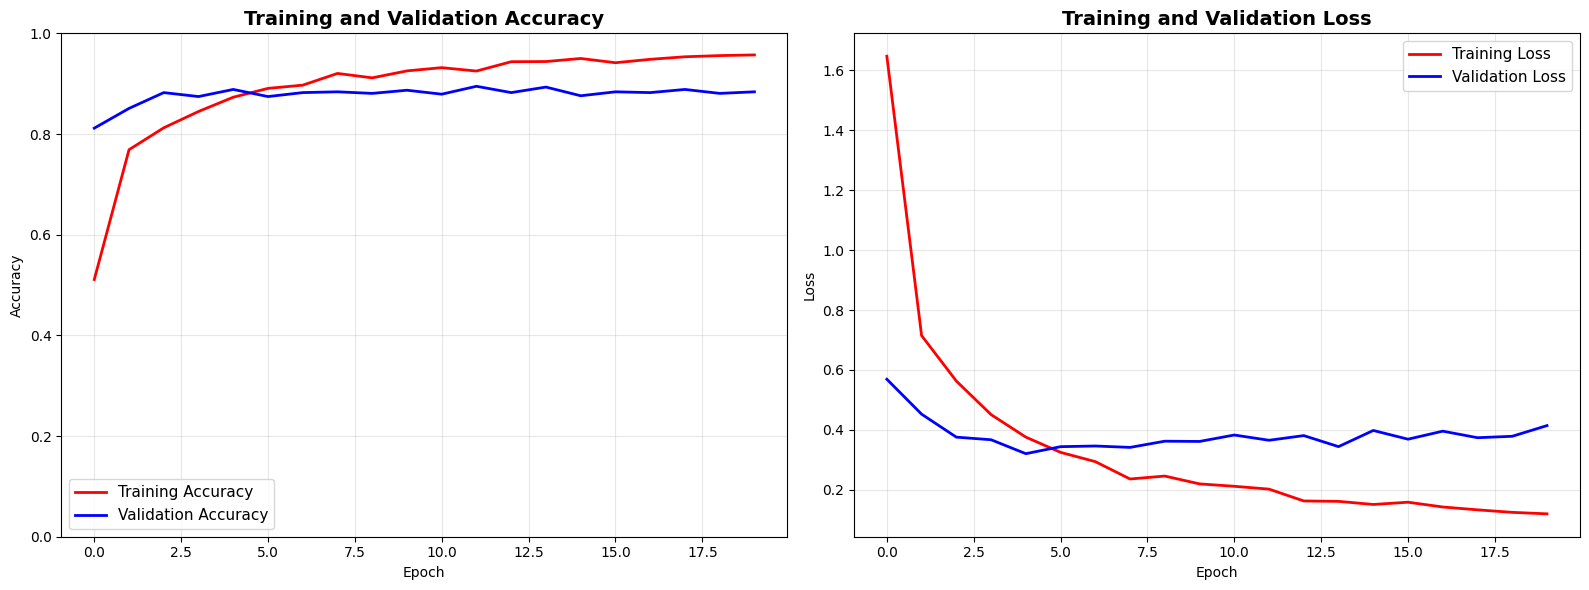


  Training Summary
  Best Training Accuracy:   0.9571
  Best Validation Accuracy: 0.8948
  Final Training Accuracy:  0.9571
  Final Validation Accuracy:0.8838
  Accuracy Gap (final):     0.0733


In [16]:
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy plot
ax1.plot(epochs_range, acc, 'r-', linewidth=2, label="Training Accuracy")
ax1.plot(epochs_range, val_acc, 'b-', linewidth=2, label="Validation Accuracy")
ax1.set_title('Training and Validation Accuracy: ResNet 50', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(fontsize=11); ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# Loss plot
ax2.plot(epochs_range, loss, 'r-', linewidth=2, label="Training Loss")
ax2.plot(epochs_range, val_loss, 'b-', linewidth=2, label="Validation Loss")
ax2.set_title('Training and Validation Loss: ResNet50', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(fontsize=11); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Stats printout
print(f"\n{'='*60}")
print("  Training Summary")
print(f"{'='*60}")
print(f"  Best Training Accuracy:   {max(acc):.4f}")
print(f"  Best Validation Accuracy: {max(val_acc):.4f}")
print(f"  Final Training Accuracy:  {acc[-1]:.4f}")
print(f"  Final Validation Accuracy:{val_acc[-1]:.4f}")
print(f"  Accuracy Gap (final):     {abs(acc[-1] - val_acc[-1]):.4f}")
print(f"{'='*60}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step


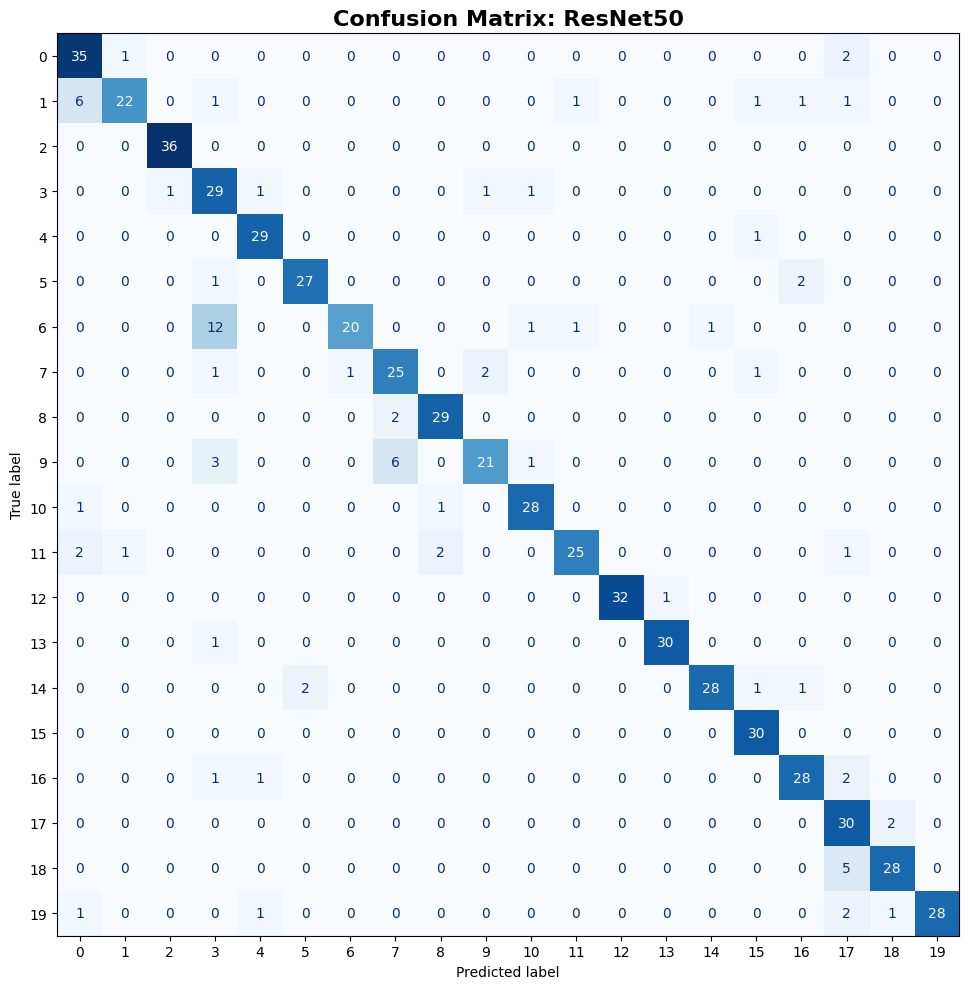

In [18]:
# confusion matrix visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# need lables first
y_true_labels = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = ResNet50_model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# to plot
fig, ax = plt.subplots(figsize=(12, 10))
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Blues', ax=ax, colorbar=False)
ax.set_title('Confusion Matrix: ResNet50', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os

# Evaluate on test set
print("Evaluating on test set...")
test_loss, test_accuracy =ResNet50_model.evaluate(test_ds, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Evaluating on test set...
Test Loss: 0.5395
Test Accuracy: 0.8696


Test Accuracy is 86.96%. Will add in data augmentation for model improvement then.

**Adding Data Augmentation to ResNet50 One at a time. Run the model with feature extraction**

This means the base layer will not be trainable then.

In [ ]:
 # data augmentation using pytorch
from torchvision import datasets, transforms
from  keras import Sequential
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from keras.utils import set_random_seed

set_random_seed(42)

# data augmentation

data_augment_feat= Sequential([
    RandomFlip("horizontal"), # random horizontal flip
])



# train gets augmentations
train_data_aug_feat = train_ds.map(lambda x, y: (data_augment_feat(preprocess_input(x)), y))

# validation and test only normalized
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

In [ ]:
from tensorflow.keras import layers, optimizers, models
import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
# for ResNet50
from keras.applications import ResNet50
from keras.models import Model

# load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', # want to use pretrained image weights
                      include_top=False, # do not want to use original head, use custom below
                      # also allows for feature extraction
                      input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False # for feature extraction

# creating own cutstom head
X = base_model.output
X = GlobalAveragePooling2D()(X)
X = Dropout(0.3)(X)
X = Dense(128, activation='relu')(X)
X = Dropout(0.2)(X)

# need to add softmax layer for the number of classes (20 being used)
predictions = Dense(20, activation = 'softmax')(X)

# create the final model
ResNet50_model = Model(inputs = base_model.input, outputs = predictions)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# compile model
ResNet50_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# now fit and train the model
history = ResNet50_model.fit(
    train_data_aug_feat,
    validation_data = val_ds,
    epochs = 20,
    verbose = 1
)

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 47s 312ms/step - accuracy: 0.4683 - loss: 1.8326 - val_accuracy: 0.8838 - val_loss: 0.3748
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 15s 163ms/step - accuracy: 0.8770 - loss: 0.3654 - val_accuracy: 0.9074 - val_loss: 0.3046
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 16s 175ms/step - accuracy: 0.9130 - loss: 0.2586 - val_accuracy: 0.9027 - val_loss: 0.2938
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 19s 163ms/step - accuracy: 0.9302 - loss: 0.2043 - val_accuracy: 0.9152 - val_loss: 0.2548
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 24s 198ms/step - accuracy: 0.9378 - loss: 0.1755 - val_accuracy: 0.9137 - val_loss: 0.2662
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 160ms/step - accuracy: 0.9444 - loss: 0.1602 - val_accuracy: 0.9137 - val_loss: 0.2476
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 162ms/step - accuracy: 0.9596 - loss: 0.1124 - val_accuracy: 0.9042 - val_loss: 0.3096
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step - accuracy: 0.9555 - loss: 0.1185 - val_accu

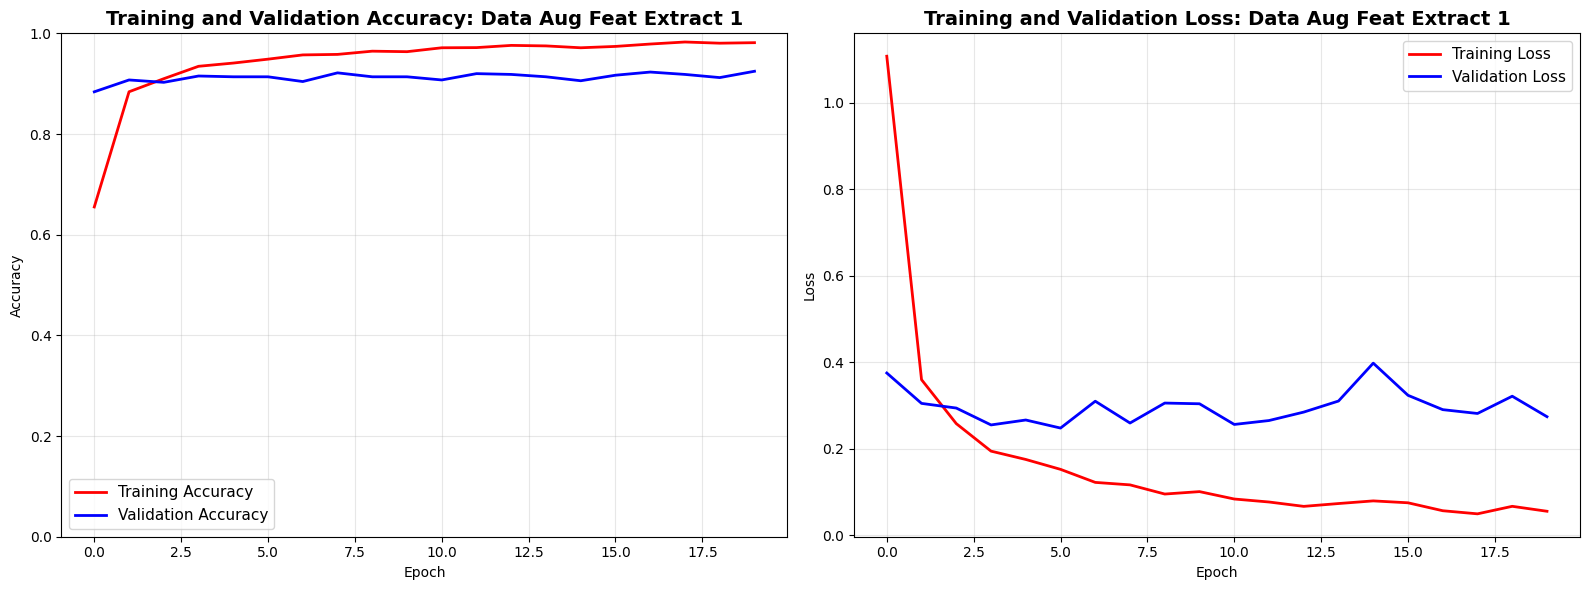


  Training Summary
  Best Training Accuracy:   0.9828
  Best Validation Accuracy: 0.9246
  Final Training Accuracy:  0.9814
  Final Validation Accuracy:0.9246
  Accuracy Gap (final): 0.0568


In [ ]:
# visualizat data aug best
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy plot
ax1.plot(epochs_range, acc, 'r-', linewidth=2, label="Training Accuracy")
ax1.plot(epochs_range, val_acc, 'b-', linewidth=2, label="Validation Accuracy")
ax1.set_title('Training and Validation Accuracy: Data Aug Feat Extract 1', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(fontsize=11); ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# Loss plot
ax2.plot(epochs_range, loss, 'r-', linewidth=2, label="Training Loss")
ax2.plot(epochs_range, val_loss, 'b-', linewidth=2, label="Validation Loss")
ax2.set_title('Training and Validation Loss: Data Aug Feat Extract 1', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(fontsize=11); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Stats printout
print(f"\n{'='*60}")
print("  Training Summary")
print(f"{'='*60}")
print(f"  Best Training Accuracy:   {max(acc):.4f}")
print(f"  Best Validation Accuracy: {max(val_acc):.4f}")
print(f"  Final Training Accuracy:  {acc[-1]:.4f}")
print(f"  Final Validation Accuracy:{val_acc[-1]:.4f}")
print(f"  Accuracy Gap (final): {abs(acc[-1] - val_acc[-1]):.4f}")

In [ ]:
# Evaluation
import numpy as np
import seaborn as sns

# Evaluate on test set
print("Evaluating on test set...")
test_loss, test_accuracy =ResNet50_model.evaluate(test_ds, verbose=0)
print(f"Test Loss (Data Aug Feat Extract 1 (Pre transfer learning)): {test_loss:.4f}")
print(f"Test Accuracy (Data Aug Feat Extract 1 (Pre transfer learning)): {test_accuracy:.4f}")

Evaluating on test set...
Test Loss (Data Aug Feat Extract 1 (Pre transfer learning)): 0.2815
Test Accuracy (Data Aug Feat Extract 1 (Pre transfer learning)): 0.9161


21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 302ms/step


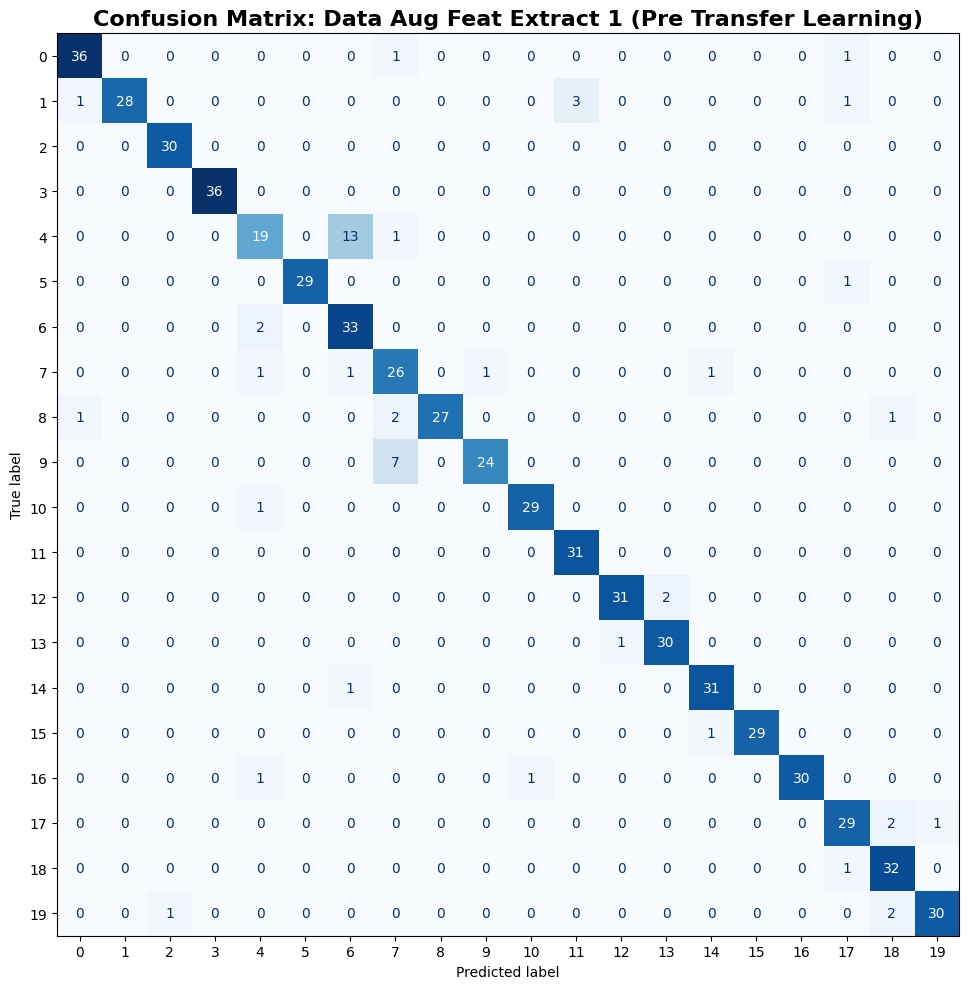

In [ ]:
# confusion matrix visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# need lables first
y_true_labels = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = ResNet50_model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# to plot
fig, ax = plt.subplots(figsize=(12, 10))
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Blues', ax=ax, colorbar=False)
ax.set_title('Confusion Matrix: Data Aug Feat Extract 1 (Pre Transfer Learning)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Model is performing even better with Resnet preprocessing, and only head (feature extraction). Will add more data augmention to improve performacne.

In [ ]:
 # data augmentation using pytorch
from torchvision import datasets, transforms
from  keras import Sequential
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from keras.utils import set_random_seed

set_random_seed(42)

# data augmentation

data_augment_feat2= Sequential([
    RandomFlip("horizontal"), # random horizontal flip
    RandomRotation(0.03), # random rotation - smaller value to prevent over rotating
])



# train gets augmentations
train_data_aug_feat2 = train_ds.map(lambda x, y: (data_augment_feat2(preprocess_input(x)), y))

# validation and test only normalized
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

In [ ]:
from tensorflow.keras import layers, optimizers, models
import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
# for ResNet50
from keras.applications import ResNet50
from keras.models import Model

# load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', # want to use pretrained image weights
                      include_top=False, # do not want to use original head, use custom below
                      # also allows for feature extraction
                      input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False # for feature extraction

# creating own cutstom head
X = base_model.output
X = GlobalAveragePooling2D()(X)
X = Dropout(0.3)(X)
X = Dense(128, activation='relu')(X)
X = Dropout(0.2)(X)

# need to add softmax layer for the number of classes (20 being used)
predictions = Dense(20, activation = 'softmax')(X)

# create the final model
ResNet50_model = Model(inputs = base_model.input, outputs = predictions)

In [ ]:
# compile model
ResNet50_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# now fit and train the model
history = ResNet50_model.fit(
    train_data_aug_feat2,
    validation_data = val_ds,
    epochs = 20,
    verbose = 1
)

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 52s 429ms/step - accuracy: 0.4671 - loss: 1.8804 - val_accuracy: 0.6656 - val_loss: 1.0774
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 32s 347ms/step - accuracy: 0.8690 - loss: 0.4102 - val_accuracy: 0.7143 - val_loss: 0.8553
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 29s 310ms/step - accuracy: 0.9065 - loss: 0.2722 - val_accuracy: 0.7410 - val_loss: 0.8291
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 30s 325ms/step - accuracy: 0.9250 - loss: 0.2252 - val_accuracy: 0.7127 - val_loss: 0.9624
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 29s 309ms/step - accuracy: 0.9229 - loss: 0.2188 - val_accuracy: 0.7582 - val_loss: 0.7882
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 29s 309ms/step - accuracy: 0.9438 - loss: 0.1756 - val_accuracy: 0.7394 - val_loss: 0.8749
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 317ms/step - accuracy: 0.9444 - loss: 0.1600 - val_accuracy: 0.7300 - val_loss: 0.9317
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 29s 307ms/step - accuracy: 0.9530 - loss: 0.1319 - val_accu

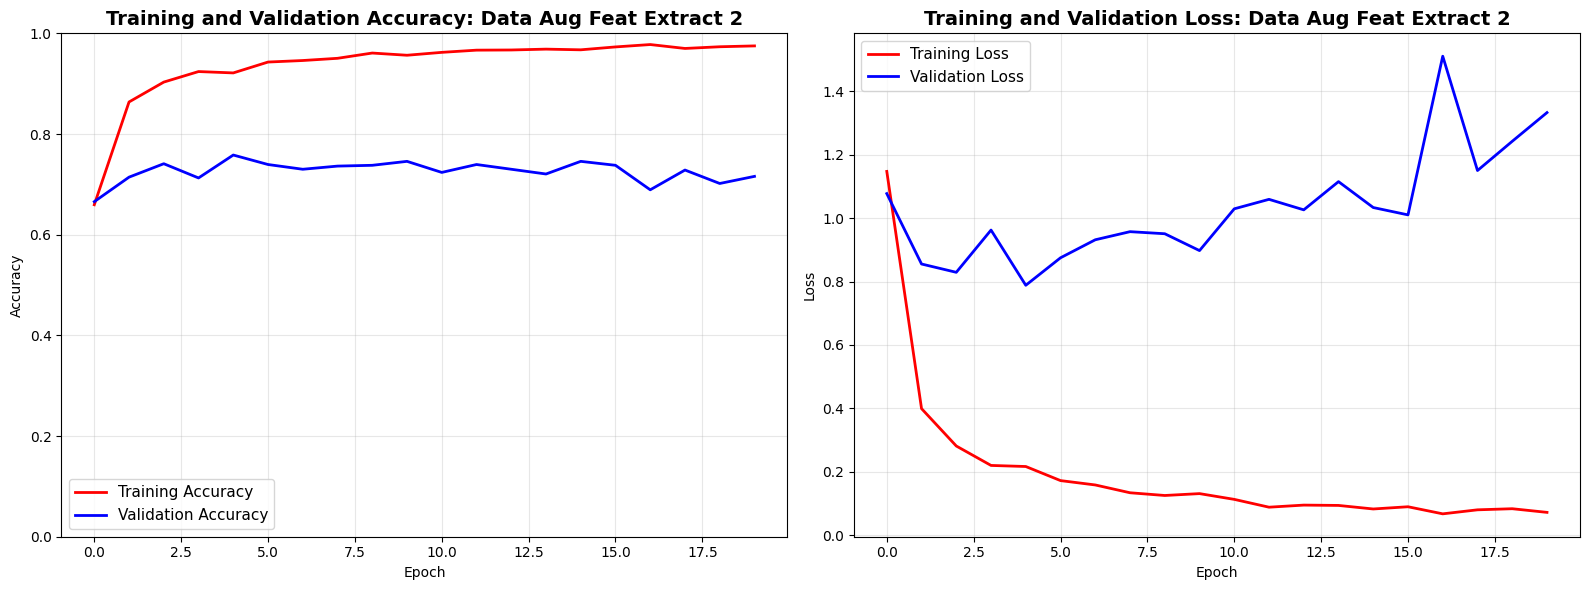


  Training Summary
  Best Training Accuracy:   0.9777
  Best Validation Accuracy: 0.7582
  Final Training Accuracy:  0.9750
  Final Validation Accuracy:0.7159
  Accuracy Gap (final): 0.2592


In [ ]:
# visualizat data aug best
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy plot
ax1.plot(epochs_range, acc, 'r-', linewidth=2, label="Training Accuracy")
ax1.plot(epochs_range, val_acc, 'b-', linewidth=2, label="Validation Accuracy")
ax1.set_title('Training and Validation Accuracy: Data Aug Feat Extract 2', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(fontsize=11); ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# Loss plot
ax2.plot(epochs_range, loss, 'r-', linewidth=2, label="Training Loss")
ax2.plot(epochs_range, val_loss, 'b-', linewidth=2, label="Validation Loss")
ax2.set_title('Training and Validation Loss: Data Aug Feat Extract 2', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(fontsize=11); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Stats printout
print(f"\n{'='*60}")
print("  Training Summary")
print(f"{'='*60}")
print(f"  Best Training Accuracy:   {max(acc):.4f}")
print(f"  Best Validation Accuracy: {max(val_acc):.4f}")
print(f"  Final Training Accuracy:  {acc[-1]:.4f}")
print(f"  Final Validation Accuracy:{val_acc[-1]:.4f}")
print(f"  Accuracy Gap (final): {abs(acc[-1] - val_acc[-1]):.4f}")

In [ ]:
# Evaluation
import numpy as np
import seaborn as sns

# Evaluate on test set
print("Evaluating on test set...")
test_loss, test_accuracy =ResNet50_model.evaluate(test_ds, verbose=0)
print(f"Test Loss (Data Aug Feat Extract 2 (Pre transfer learning)): {test_loss:.4f}")
print(f"Test Accuracy (Data Aug Feat Extract 2 (Pre transfer learning)): {test_accuracy:.4f}")

Evaluating on test set...
Test Loss (Data Aug Feat Extract 2 (Pre transfer learning)): 1.3988
Test Accuracy (Data Aug Feat Extract 2 (Pre transfer learning)): 0.7112


Test Accuracy decreased with the random rotation. Take out and try random zoom instead.

21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 316ms/step


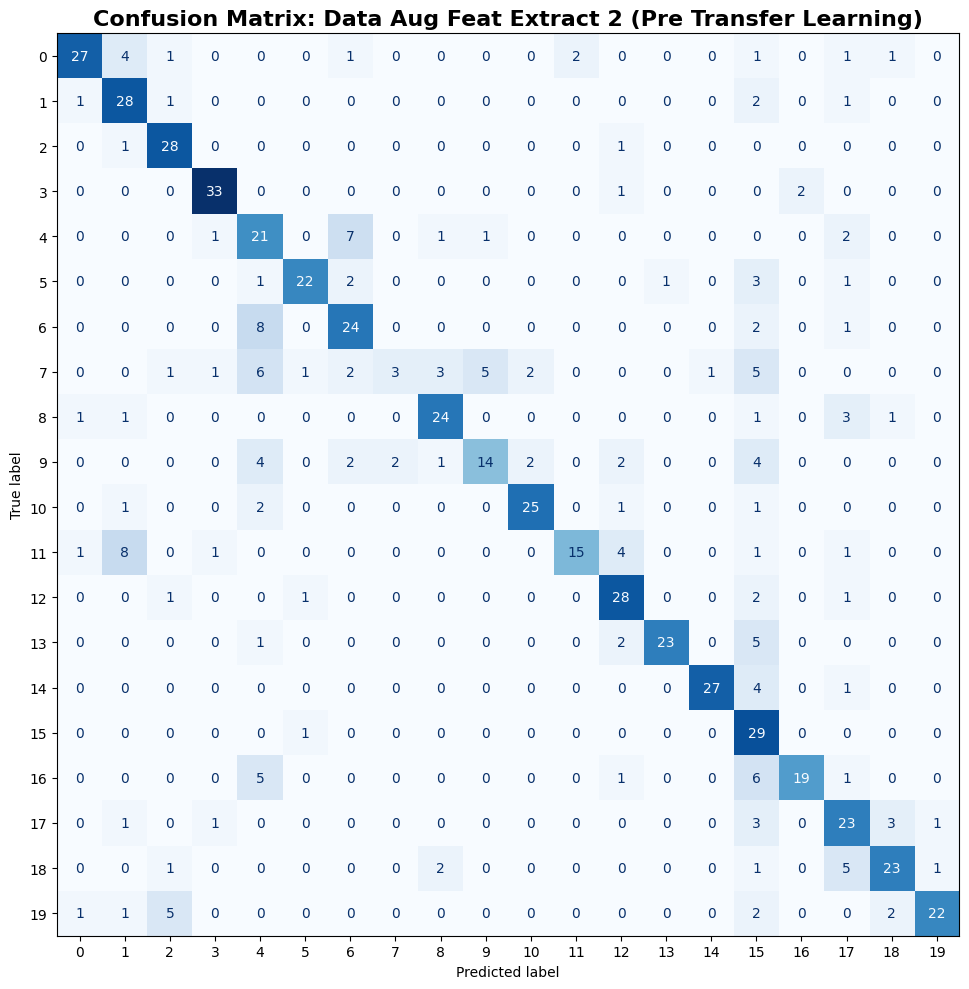

In [ ]:
# confusion matrix visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# need lables first
y_true_labels = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = ResNet50_model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# to plot
fig, ax = plt.subplots(figsize=(12, 10))
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Blues', ax=ax, colorbar=False)
ax.set_title('Confusion Matrix: Data Aug Feat Extract 2 (Pre Transfer Learning)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
 # data augmentation using pytorch
from torchvision import datasets, transforms
from  keras import Sequential
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from keras.utils import set_random_seed

set_random_seed(42)

# data augmentation

data_augment_feat3= Sequential([
    RandomFlip("horizontal"), # random horizontal flip
    RandomRotation(0.01), # random rotation - smaller value to prevent over rotating
])



# train gets augmentations
train_data_aug_feat3 = train_ds.map(lambda x, y: (data_augment_feat3(preprocess_input(x)), y))

# validation and test only normalized
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

In [ ]:
from tensorflow.keras import layers, optimizers, models
import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
# for ResNet50
from keras.applications import ResNet50
from keras.models import Model

# load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', # want to use pretrained image weights
                      include_top=False, # do not want to use original head, use custom below
                      # also allows for feature extraction
                      input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False # for feature extraction

# creating own cutstom head
X = base_model.output
X = GlobalAveragePooling2D()(X)
X = Dropout(0.3)(X)
X = Dense(128, activation='relu')(X)
X = Dropout(0.2)(X)

# need to add softmax layer for the number of classes (20 being used)
predictions = Dense(20, activation = 'softmax')(X)

# create the final model
ResNet50_model = Model(inputs = base_model.input, outputs = predictions)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# compile model
ResNet50_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# now fit and train the model
history = ResNet50_model.fit(
    train_data_aug_feat3,
    validation_data = val_ds,
    epochs = 20,
    verbose = 1
)

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 63s 459ms/step - accuracy: 0.4737 - loss: 1.8794 - val_accuracy: 0.8995 - val_loss: 0.3101
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 30s 320ms/step - accuracy: 0.8555 - loss: 0.4258 - val_accuracy: 0.9105 - val_loss: 0.2857
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 30s 321ms/step - accuracy: 0.9000 - loss: 0.2802 - val_accuracy: 0.9231 - val_loss: 0.2745
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 29s 306ms/step - accuracy: 0.9166 - loss: 0.2344 - val_accuracy: 0.9011 - val_loss: 0.3045
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 29s 307ms/step - accuracy: 0.9216 - loss: 0.2121 - val_accuracy: 0.9215 - val_loss: 0.2623
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 315ms/step - accuracy: 0.9458 - loss: 0.1630 - val_accuracy: 0.9074 - val_loss: 0.2936
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 28s 304ms/step - accuracy: 0.9551 - loss: 0.1417 - val_accuracy: 0.9215 - val_loss: 0.2601
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 29s 310ms/step - accuracy: 0.9487 - loss: 0.1340 - val_accu

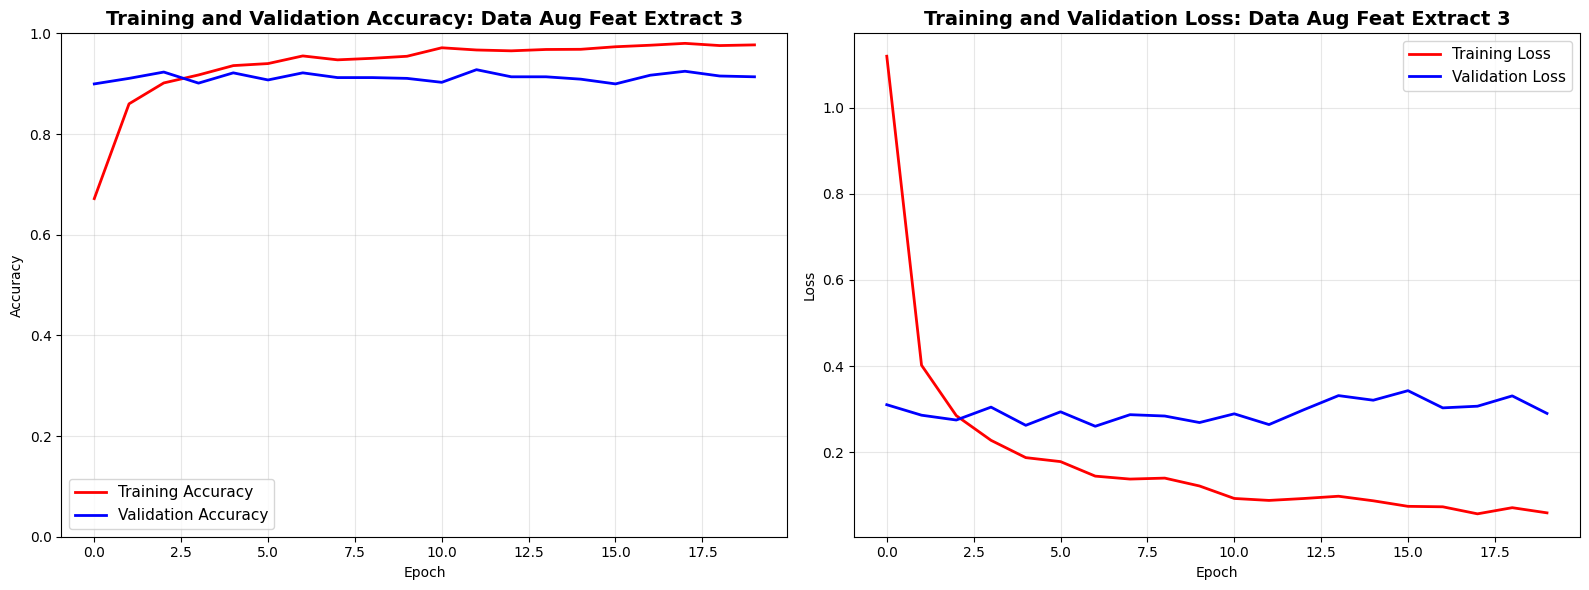


  Training Summary
  Best Training Accuracy:   0.9801
  Best Validation Accuracy: 0.9278
  Final Training Accuracy:  0.9771
  Final Validation Accuracy:0.9137
  Accuracy Gap (final): 0.0634


In [ ]:
# visualizat data aug best
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy plot
ax1.plot(epochs_range, acc, 'r-', linewidth=2, label="Training Accuracy")
ax1.plot(epochs_range, val_acc, 'b-', linewidth=2, label="Validation Accuracy")
ax1.set_title('Training and Validation Accuracy: Data Aug Feat Extract 3', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(fontsize=11); ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# Loss plot
ax2.plot(epochs_range, loss, 'r-', linewidth=2, label="Training Loss")
ax2.plot(epochs_range, val_loss, 'b-', linewidth=2, label="Validation Loss")
ax2.set_title('Training and Validation Loss: Data Aug Feat Extract 3', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(fontsize=11); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Stats printout
print(f"\n{'='*60}")
print("  Training Summary")
print(f"{'='*60}")
print(f"  Best Training Accuracy:   {max(acc):.4f}")
print(f"  Best Validation Accuracy: {max(val_acc):.4f}")
print(f"  Final Training Accuracy:  {acc[-1]:.4f}")
print(f"  Final Validation Accuracy:{val_acc[-1]:.4f}")
print(f"  Accuracy Gap (final): {abs(acc[-1] - val_acc[-1]):.4f}")

In [ ]:
# Evaluation
import numpy as np
import seaborn as sns

# Evaluate on test set
print("Evaluating on test set...")
test_loss, test_accuracy =ResNet50_model.evaluate(test_ds, verbose=0)
print(f"Test Loss (Data Aug Feat Extract 3 (Pre transfer learning)): {test_loss:.4f}")
print(f"Test Accuracy (Data Aug Feat Extract 3 (Pre transfer learning)): {test_accuracy:.4f}")

Evaluating on test set...
Test Loss (Data Aug Feat Extract 3 (Pre transfer learning)): 0.3091
Test Accuracy (Data Aug Feat Extract 3 (Pre transfer learning)): 0.9193


Best Test accuracy so far. Keep rotation and now add in zoom

21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 292ms/step


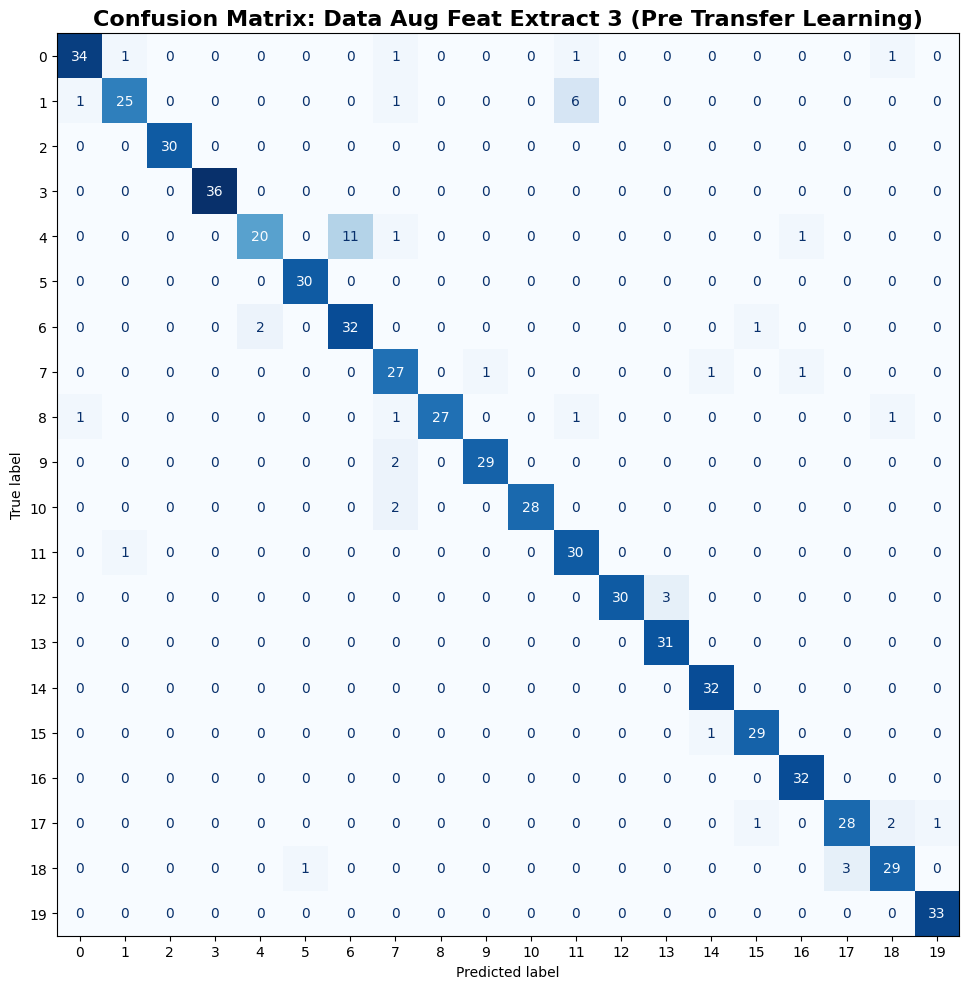

In [ ]:
# confusion matrix visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# need lables first
y_true_labels = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = ResNet50_model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# to plot
fig, ax = plt.subplots(figsize=(12, 10))
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Blues', ax=ax, colorbar=False)
ax.set_title('Confusion Matrix: Data Aug Feat Extract 3 (Pre Transfer Learning)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [8]:
 # data augmentation using pytorch
from torchvision import datasets, transforms
from  keras import Sequential
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from keras.utils import set_random_seed

set_random_seed(42)

# data augmentation

data_augment_feat4= Sequential([
    RandomFlip("horizontal"), # random horizontal flip
    RandomRotation(0.01), # random rotation - smaller value to prevent over rotating
    RandomZoom(0.05)
])



# train gets augmentations
train_data_aug_feat4 = train_ds.map(lambda x, y: (data_augment_feat4(preprocess_input(x)), y))

# validation and test only normalized
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

In [9]:
from tensorflow.keras import layers, optimizers, models
import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
# for ResNet50
from keras.applications import ResNet50
from keras.models import Model

# load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', # want to use pretrained image weights
                      include_top=False, # do not want to use original head, use custom below
                      # also allows for feature extraction
                      input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False # for feature extraction

# creating own cutstom head
X = base_model.output
X = GlobalAveragePooling2D()(X)
X = Dropout(0.3)(X)
X = Dense(128, activation='relu')(X)
X = Dropout(0.2)(X)

# need to add softmax layer for the number of classes (20 being used)
predictions = Dense(20, activation = 'softmax')(X)

# create the final model
ResNet50_model = Model(inputs = base_model.input, outputs = predictions)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [10]:
# compile model
ResNet50_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# now fit and train the model
history = ResNet50_model.fit(
    train_data_aug_feat4,
    validation_data = val_ds,
    epochs = 20,
    verbose = 1
)

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 82s 714ms/step - accuracy: 0.4786 - loss: 1.8717 - val_accuracy: 0.8932 - val_loss: 0.3286
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 440ms/step - accuracy: 0.8702 - loss: 0.4013 - val_accuracy: 0.8995 - val_loss: 0.3090
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 446ms/step - accuracy: 0.9099 - loss: 0.2966 - val_accuracy: 0.9152 - val_loss: 0.2727
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 83s 455ms/step - accuracy: 0.9024 - loss: 0.2682 - val_accuracy: 0.9137 - val_loss: 0.2683
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 80s 438ms/step - accuracy: 0.9366 - loss: 0.1905 - val_accuracy: 0.9246 - val_loss: 0.2700
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 444ms/step - accuracy: 0.9442 - loss: 0.1635 - val_accuracy: 0.9121 - val_loss: 0.2805
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 40s 432ms/step - accuracy: 0.9486 - loss: 0.1516 - val_accuracy: 0.9105 - val_loss: 0.2868
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 433ms/step - accuracy: 0.9571 - loss: 0.1360 - val_accu

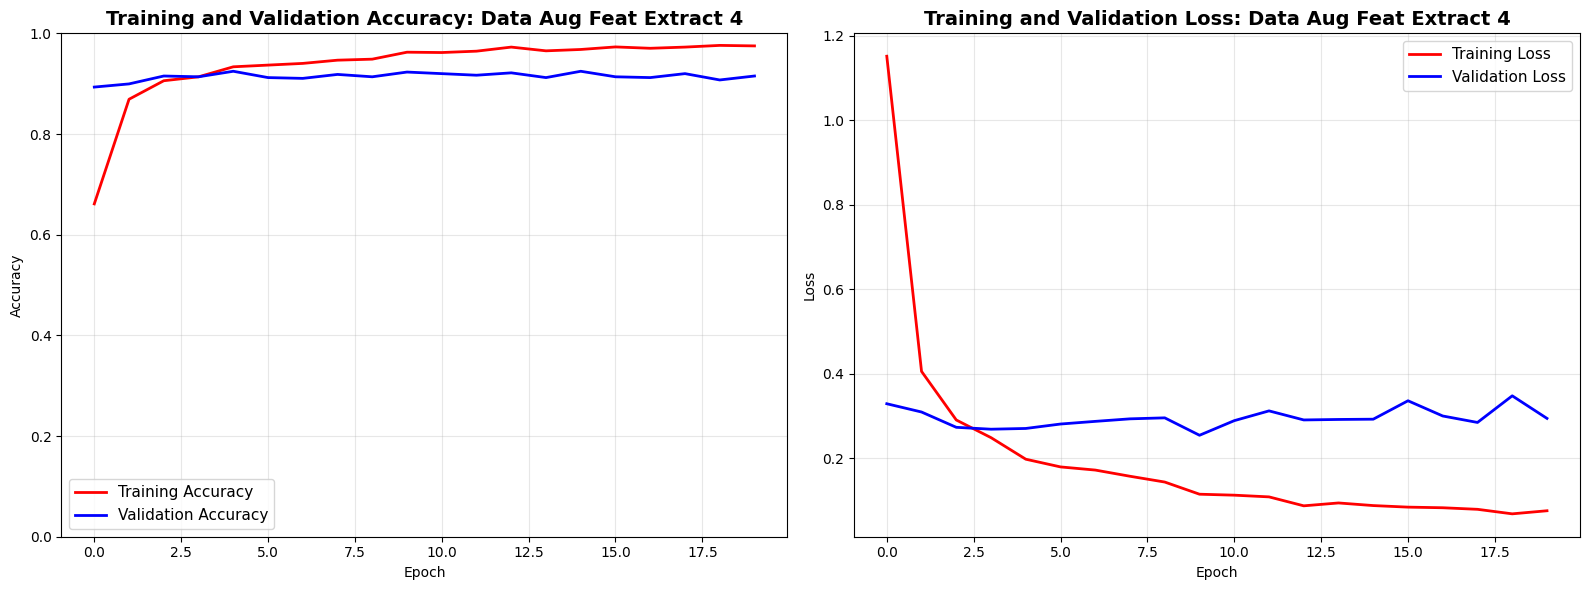


  Training Summary
  Best Training Accuracy:   0.9760
  Best Validation Accuracy: 0.9246
  Final Training Accuracy:  0.9750
  Final Validation Accuracy:0.9152
  Accuracy Gap (final): 0.0598


In [11]:
# visualizat data aug best
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy plot
ax1.plot(epochs_range, acc, 'r-', linewidth=2, label="Training Accuracy")
ax1.plot(epochs_range, val_acc, 'b-', linewidth=2, label="Validation Accuracy")
ax1.set_title('Training and Validation Accuracy: Data Aug Feat Extract 4', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(fontsize=11); ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# Loss plot
ax2.plot(epochs_range, loss, 'r-', linewidth=2, label="Training Loss")
ax2.plot(epochs_range, val_loss, 'b-', linewidth=2, label="Validation Loss")
ax2.set_title('Training and Validation Loss: Data Aug Feat Extract 4', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(fontsize=11); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Stats printout
print(f"\n{'='*60}")
print("  Training Summary")
print(f"{'='*60}")
print(f"  Best Training Accuracy:   {max(acc):.4f}")
print(f"  Best Validation Accuracy: {max(val_acc):.4f}")
print(f"  Final Training Accuracy:  {acc[-1]:.4f}")
print(f"  Final Validation Accuracy:{val_acc[-1]:.4f}")
print(f"  Accuracy Gap (final): {abs(acc[-1] - val_acc[-1]):.4f}")

In [12]:
# Evaluation
import numpy as np
import seaborn as sns

# Evaluate on test set
print("Evaluating on test set...")
test_loss, test_accuracy =ResNet50_model.evaluate(test_ds, verbose=0)
print(f"Test Loss (Data Aug Feat Extract 4 (Pre transfer learning)): {test_loss:.4f}")
print(f"Test Accuracy (Data Aug Feat Extract 4 (Pre transfer learning)): {test_accuracy:.4f}")

Evaluating on test set...
Test Loss (Data Aug Feat Extract 4 (Pre transfer learning)): 0.3231
Test Accuracy (Data Aug Feat Extract 4 (Pre transfer learning)): 0.9084


Test accuracy when down sligtly. try a less rigorous number. If that doesn't work try next data augmentation technique.

21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 551ms/step


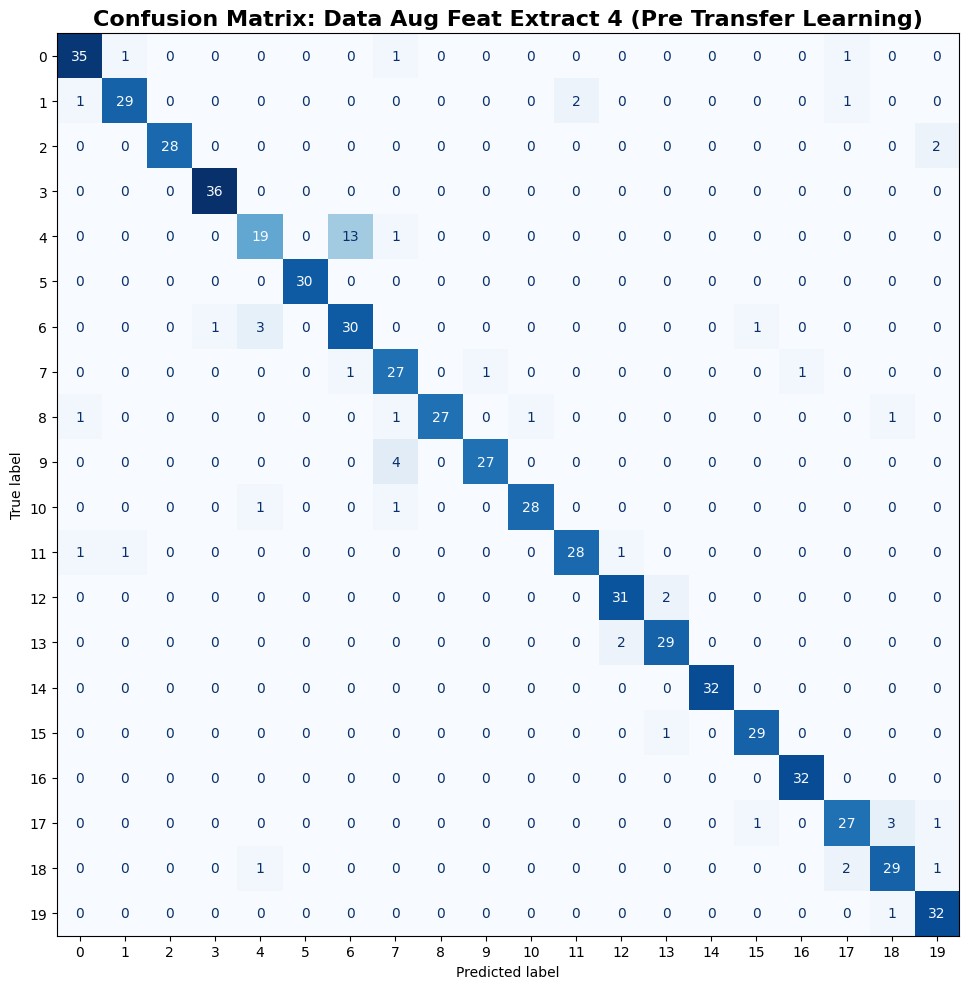

In [13]:
# confusion matrix visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# need lables first
y_true_labels = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = ResNet50_model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# to plot
fig, ax = plt.subplots(figsize=(12, 10))
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Blues', ax=ax, colorbar=False)
ax.set_title('Confusion Matrix: Data Aug Feat Extract 4 (Pre Transfer Learning)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [9]:
# data augmentation using pytorch
from torchvision import datasets, transforms
from  keras import Sequential
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from keras.utils import set_random_seed

set_random_seed(42)

# data augmentation

data_augment_feat5= Sequential([
    RandomFlip("horizontal"), # random horizontal flip
    RandomRotation(0.01), # random rotation - smaller value to prevent over rotating
    RandomZoom(0.02) # less intense zoom
])



# train gets augmentations
train_data_aug_feat5 = train_ds.map(lambda x, y: (data_augment_feat5(preprocess_input(x)), y))

# validation and test only normalized
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

In [10]:
from tensorflow.keras import layers, optimizers, models
import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
# for ResNet50
from keras.applications import ResNet50
from keras.models import Model

# load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', # want to use pretrained image weights
                      include_top=False, # do not want to use original head, use custom below
                      # also allows for feature extraction
                      input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False # for feature extraction

# creating own cutstom head
X = base_model.output
X = GlobalAveragePooling2D()(X)
X = Dropout(0.3)(X)
X = Dense(128, activation='relu')(X)
X = Dropout(0.2)(X)

# need to add softmax layer for the number of classes (20 being used)
predictions = Dense(20, activation = 'softmax')(X)

# create the final model
ResNet50_model = Model(inputs = base_model.input, outputs = predictions)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [11]:
# compile model
ResNet50_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# now fit and train the model
history = ResNet50_model.fit(
    train_data_aug_feat5,
    validation_data = val_ds,
    epochs = 20,
    verbose = 1
)

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 69s 589ms/step - accuracy: 0.4960 - loss: 1.8117 - val_accuracy: 0.9121 - val_loss: 0.3086
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 452ms/step - accuracy: 0.8875 - loss: 0.3631 - val_accuracy: 0.9105 - val_loss: 0.2905
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 82s 453ms/step - accuracy: 0.9029 - loss: 0.2926 - val_accuracy: 0.9152 - val_loss: 0.2633
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 443ms/step - accuracy: 0.9171 - loss: 0.2385 - val_accuracy: 0.9278 - val_loss: 0.2591
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 82s 442ms/step - accuracy: 0.9279 - loss: 0.2066 - val_accuracy: 0.9184 - val_loss: 0.2580
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 81s 436ms/step - accuracy: 0.9419 - loss: 0.1655 - val_accuracy: 0.9231 - val_loss: 0.2270
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 439ms/step - accuracy: 0.9452 - loss: 0.1518 - val_accuracy: 0.9246 - val_loss: 0.2651
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 452ms/step - accuracy: 0.9503 - loss: 0.1291 - val_accu

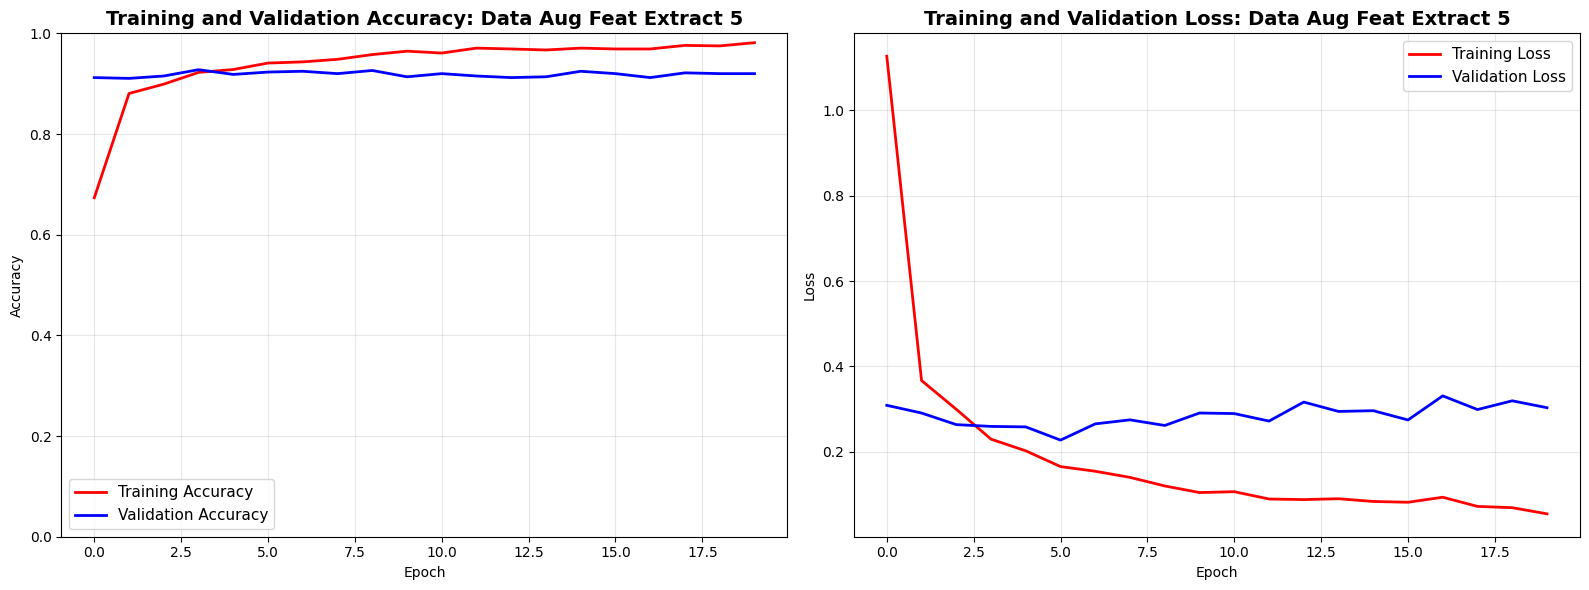


  Training Summary
  Best Training Accuracy:   0.9814
  Best Validation Accuracy: 0.9278
  Final Training Accuracy:  0.9814
  Final Validation Accuracy:0.9199
  Accuracy Gap (final): 0.0615


In [12]:
# visualizat data aug best
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy plot
ax1.plot(epochs_range, acc, 'r-', linewidth=2, label="Training Accuracy")
ax1.plot(epochs_range, val_acc, 'b-', linewidth=2, label="Validation Accuracy")
ax1.set_title('Training and Validation Accuracy: Data Aug Feat Extract 5', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(fontsize=11); ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# Loss plot
ax2.plot(epochs_range, loss, 'r-', linewidth=2, label="Training Loss")
ax2.plot(epochs_range, val_loss, 'b-', linewidth=2, label="Validation Loss")
ax2.set_title('Training and Validation Loss: Data Aug Feat Extract 5', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(fontsize=11); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Stats printout
print(f"\n{'='*60}")
print("  Training Summary")
print(f"{'='*60}")
print(f"  Best Training Accuracy:   {max(acc):.4f}")
print(f"  Best Validation Accuracy: {max(val_acc):.4f}")
print(f"  Final Training Accuracy:  {acc[-1]:.4f}")
print(f"  Final Validation Accuracy:{val_acc[-1]:.4f}")
print(f"  Accuracy Gap (final): {abs(acc[-1] - val_acc[-1]):.4f}")

In [13]:
# Evaluation
import numpy as np
import seaborn as sns

# Evaluate on test set
print("Evaluating on test set...")
test_loss, test_accuracy =ResNet50_model.evaluate(test_ds, verbose=0)
print(f"Test Loss (Data Aug Feat Extract 5 (Pre transfer learning)): {test_loss:.4f}")
print(f"Test Accuracy (Data Aug Feat Extract 5 (Pre transfer learning)): {test_accuracy:.4f}")

Evaluating on test set...
Test Loss (Data Aug Feat Extract 5 (Pre transfer learning)): 0.2926
Test Accuracy (Data Aug Feat Extract 5 (Pre transfer learning)): 0.9208


21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 258ms/step


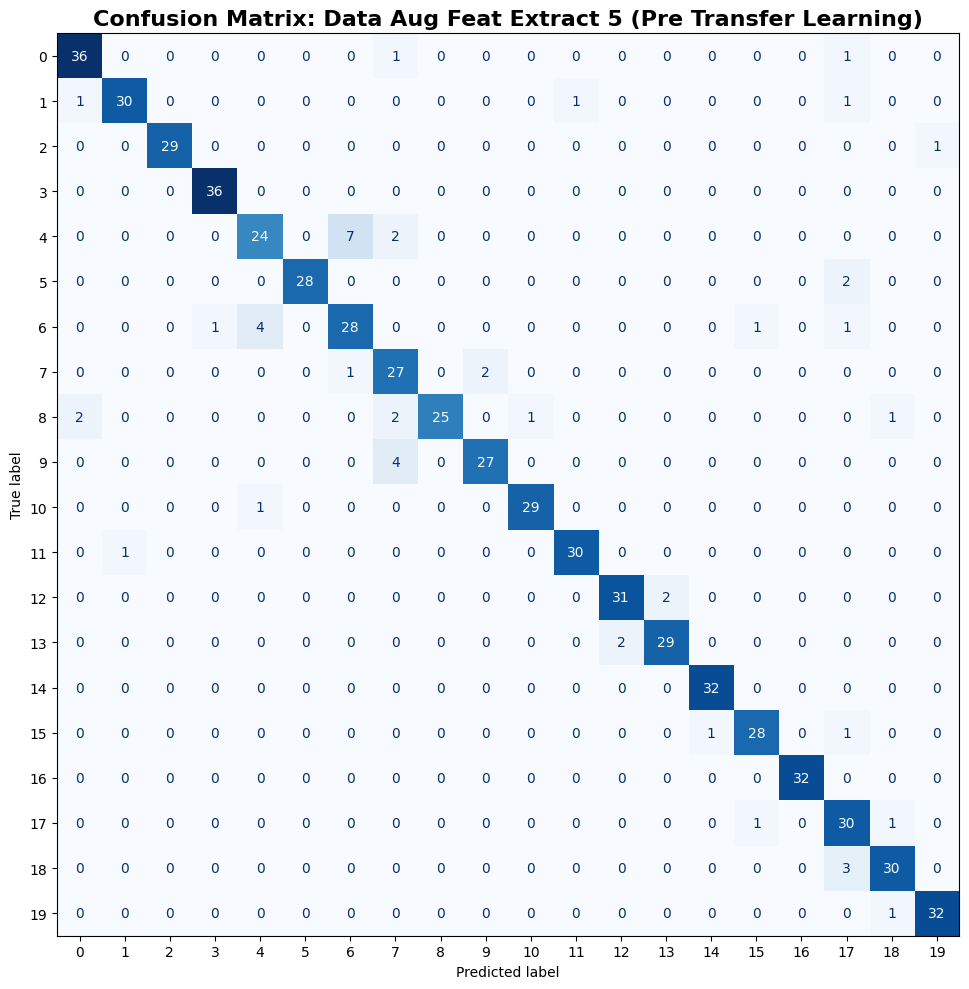

In [14]:
# confusion matrix visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# need lables first
y_true_labels = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = ResNet50_model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# to plot
fig, ax = plt.subplots(figsize=(12, 10))
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Blues', ax=ax, colorbar=False)
ax.set_title('Confusion Matrix: Data Aug Feat Extract 5 (Pre Transfer Learning)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Best test accuracy. Now add new data augmentation

In [8]:
# data augmentation using pytorch
from torchvision import datasets, transforms
from  keras import Sequential
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomContrast
from keras.utils import set_random_seed

set_random_seed(42)

# data augmentation

data_augment_feat6= Sequential([
    RandomFlip("horizontal"), # random horizontal flip
    RandomRotation(0.01), # random rotation - smaller value to prevent over rotating
    RandomZoom(0.02), # less intense zoom
    RandomContrast(0.05) # random contrast
])



# train gets augmentations
train_data_aug_feat6 = train_ds.map(lambda x, y: (data_augment_feat6(preprocess_input(x)), y))

# validation and test only normalized
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

In [9]:
from tensorflow.keras import layers, optimizers, models
import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
# for ResNet50
from keras.applications import ResNet50
from keras.models import Model

# load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', # want to use pretrained image weights
                      include_top=False, # do not want to use original head, use custom below
                      # also allows for feature extraction
                      input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False # for feature extraction

# creating own cutstom head
X = base_model.output
X = GlobalAveragePooling2D()(X)
X = Dropout(0.3)(X)
X = Dense(128, activation='relu')(X)
X = Dropout(0.2)(X)

# need to add softmax layer for the number of classes (20 being used)
predictions = Dense(20, activation = 'softmax')(X)

# create the final model
ResNet50_model = Model(inputs = base_model.input, outputs = predictions)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [11]:
# compile model
ResNet50_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# now fit and train the model
history = ResNet50_model.fit(
    train_data_aug_feat6,
    validation_data = val_ds,
    epochs = 20,
    verbose = 1
)

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 91s 664ms/step - accuracy: 0.2981 - loss: 2.5192 - val_accuracy: 0.8179 - val_loss: 0.6517
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 49s 520ms/step - accuracy: 0.6477 - loss: 1.1390 - val_accuracy: 0.8744 - val_loss: 0.4448
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 47s 503ms/step - accuracy: 0.6886 - loss: 0.9400 - val_accuracy: 0.8556 - val_loss: 0.4228
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 48s 516ms/step - accuracy: 0.7303 - loss: 0.7866 - val_accuracy: 0.8932 - val_loss: 0.3403
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 49s 528ms/step - accuracy: 0.7565 - loss: 0.7078 - val_accuracy: 0.8619 - val_loss: 0.4001
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 48s 517ms/step - accuracy: 0.7938 - loss: 0.6240 - val_accuracy: 0.8713 - val_loss: 0.3813
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 48s 515ms/step - accuracy: 0.7967 - loss: 0.5710 - val_accuracy: 0.8854 - val_loss: 0.3544
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 48s 514ms/step - accuracy: 0.8185 - loss: 0.5324 - val_accu

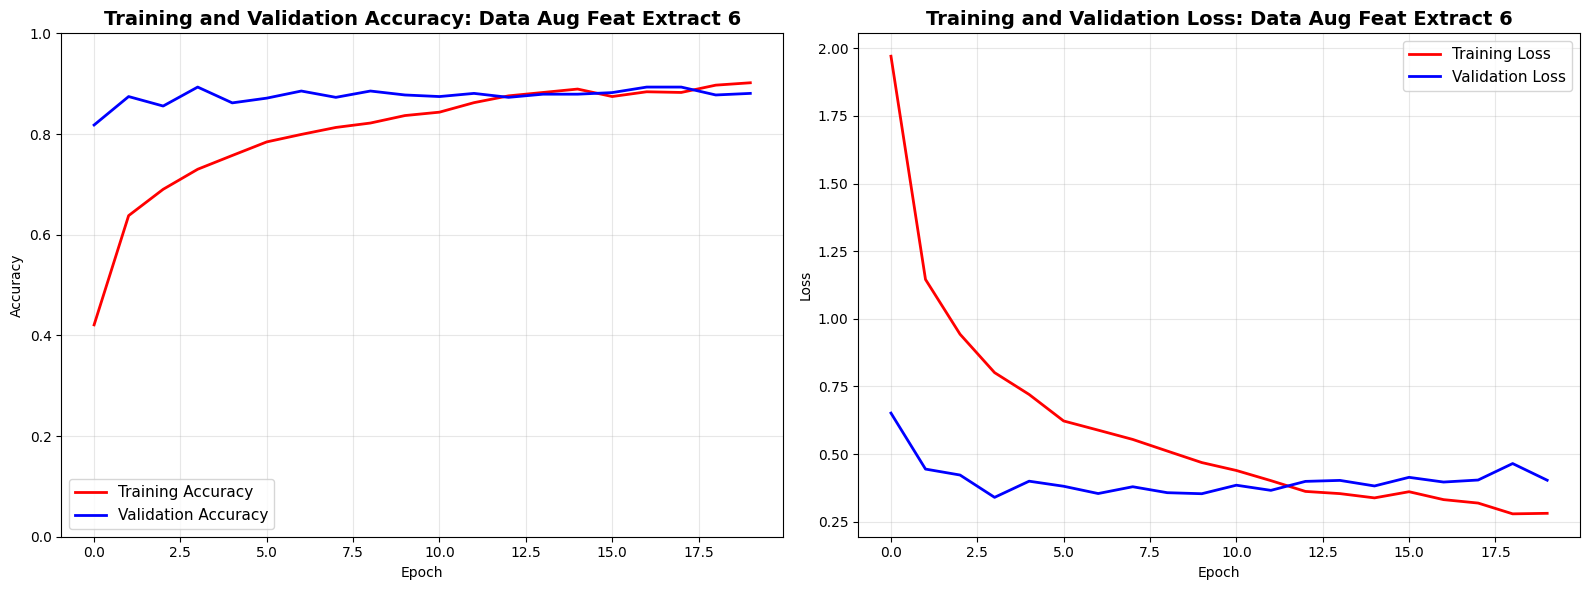


  Training Summary
  Best Training Accuracy:   0.9018
  Best Validation Accuracy: 0.8932
  Final Training Accuracy:  0.9018
  Final Validation Accuracy:0.8807
  Accuracy Gap (final): 0.0211


In [12]:
# visualizat data aug best
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy plot
ax1.plot(epochs_range, acc, 'r-', linewidth=2, label="Training Accuracy")
ax1.plot(epochs_range, val_acc, 'b-', linewidth=2, label="Validation Accuracy")
ax1.set_title('Training and Validation Accuracy: Data Aug Feat Extract 6', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(fontsize=11); ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# Loss plot
ax2.plot(epochs_range, loss, 'r-', linewidth=2, label="Training Loss")
ax2.plot(epochs_range, val_loss, 'b-', linewidth=2, label="Validation Loss")
ax2.set_title('Training and Validation Loss: Data Aug Feat Extract 6', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(fontsize=11); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Stats printout
print(f"\n{'='*60}")
print("  Training Summary")
print(f"{'='*60}")
print(f"  Best Training Accuracy:   {max(acc):.4f}")
print(f"  Best Validation Accuracy: {max(val_acc):.4f}")
print(f"  Final Training Accuracy:  {acc[-1]:.4f}")
print(f"  Final Validation Accuracy:{val_acc[-1]:.4f}")
print(f"  Accuracy Gap (final): {abs(acc[-1] - val_acc[-1]):.4f}")

In [13]:
# Evaluation
import numpy as np
import seaborn as sns

# Evaluate on test set
print("Evaluating on test set...")
test_loss, test_accuracy =ResNet50_model.evaluate(test_ds, verbose=0)
print(f"Test Loss (Data Aug Feat Extract 6 (Pre transfer learning)): {test_loss:.4f}")
print(f"Test Accuracy (Data Aug Feat Extract 6 (Pre transfer learning)): {test_accuracy:.4f}")

Evaluating on test set...
Test Loss (Data Aug Feat Extract 6 (Pre transfer learning)): 0.3990
Test Accuracy (Data Aug Feat Extract 6 (Pre transfer learning)): 0.8758


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step


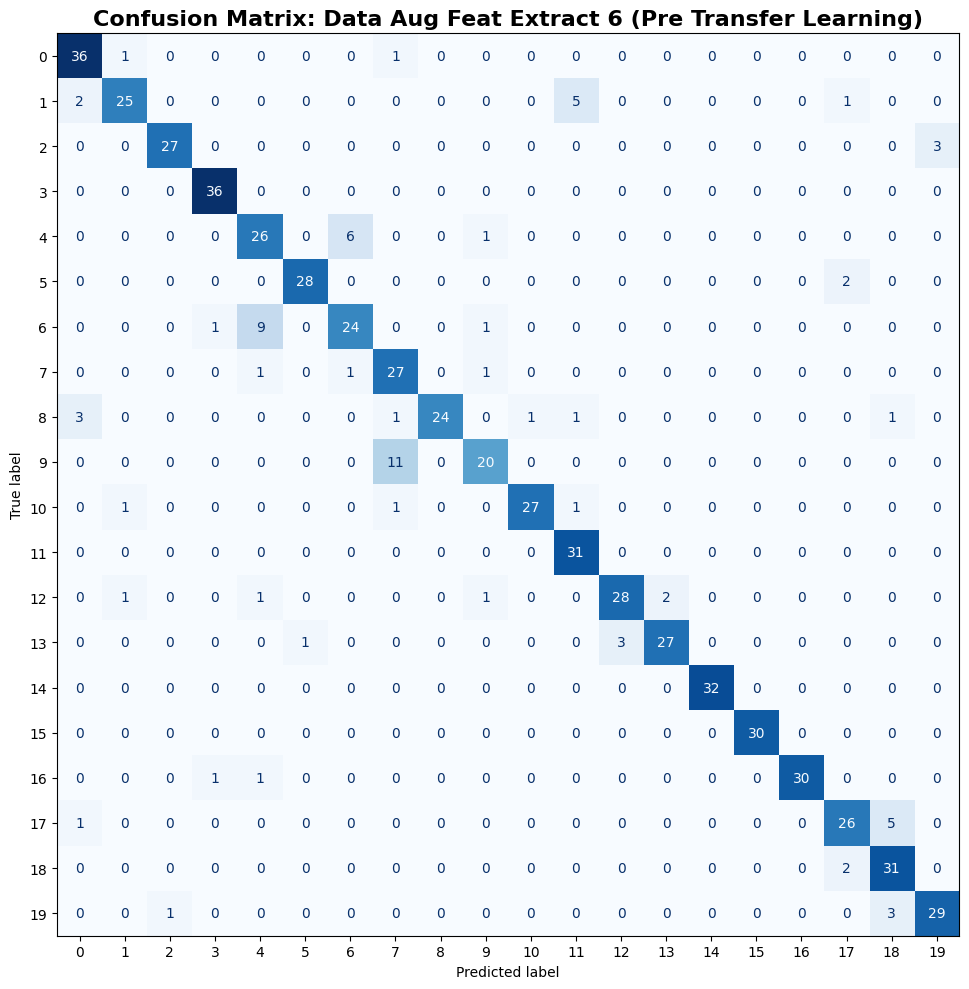

In [15]:
# confusion matrix visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# need lables first
y_true_labels = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = ResNet50_model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# to plot
fig, ax = plt.subplots(figsize=(12, 10))
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Blues', ax=ax, colorbar=False)
ax.set_title('Confusion Matrix: Data Aug Feat Extract 6 (Pre Transfer Learning)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Test accuracy went down to less than 90. Remove contrast and try next data augmentation.

In [7]:
# data augmentation using pytorch
from torchvision import datasets, transforms
from  keras import Sequential
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomContrast , RandomTranslation
from keras.utils import set_random_seed

set_random_seed(42)

# data augmentation

data_augment_feat7= Sequential([
    RandomFlip("horizontal"), # random horizontal flip
    RandomRotation(0.01), # random rotation - smaller value to prevent over rotating
    RandomZoom(0.02), # less intense zoom
    RandomTranslation(0.01, 0.01) # random translation that is conservative
])



# train gets augmentations
train_data_aug_feat7 = train_ds.map(lambda x, y: (data_augment_feat7(preprocess_input(x)), y))

# validation and test only normalized
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

In [8]:
from tensorflow.keras import layers, optimizers, models
import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
# for ResNet50
from keras.applications import ResNet50
from keras.models import Model

# load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', # want to use pretrained image weights
                      include_top=False, # do not want to use original head, use custom below
                      # also allows for feature extraction
                      input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False # for feature extraction

# creating own cutstom head
X = base_model.output
X = GlobalAveragePooling2D()(X)
X = Dropout(0.3)(X)
X = Dense(128, activation='relu')(X)
X = Dropout(0.2)(X)

# need to add softmax layer for the number of classes (20 being used)
predictions = Dense(20, activation = 'softmax')(X)

# create the final model
ResNet50_model = Model(inputs = base_model.input, outputs = predictions)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [9]:
# compile model
ResNet50_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# now fit and train the model
history = ResNet50_model.fit(
    train_data_aug_feat7,
    validation_data = val_ds,
    epochs = 20,
    verbose = 1
)

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 81s 712ms/step - accuracy: 0.4739 - loss: 1.8110 - val_accuracy: 0.8980 - val_loss: 0.3263
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 52s 560ms/step - accuracy: 0.8719 - loss: 0.4019 - val_accuracy: 0.9215 - val_loss: 0.2772
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 53s 565ms/step - accuracy: 0.9011 - loss: 0.3008 - val_accuracy: 0.9199 - val_loss: 0.2767
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 53s 568ms/step - accuracy: 0.9127 - loss: 0.2679 - val_accuracy: 0.9278 - val_loss: 0.2688
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 53s 565ms/step - accuracy: 0.9290 - loss: 0.2237 - val_accuracy: 0.9262 - val_loss: 0.2684
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 53s 564ms/step - accuracy: 0.9355 - loss: 0.2037 - val_accuracy: 0.9121 - val_loss: 0.2588
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 56s 596ms/step - accuracy: 0.9403 - loss: 0.1603 - val_accuracy: 0.9184 - val_loss: 0.2986
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 52s 555ms/step - accuracy: 0.9485 - loss: 0.1517 - val_accu

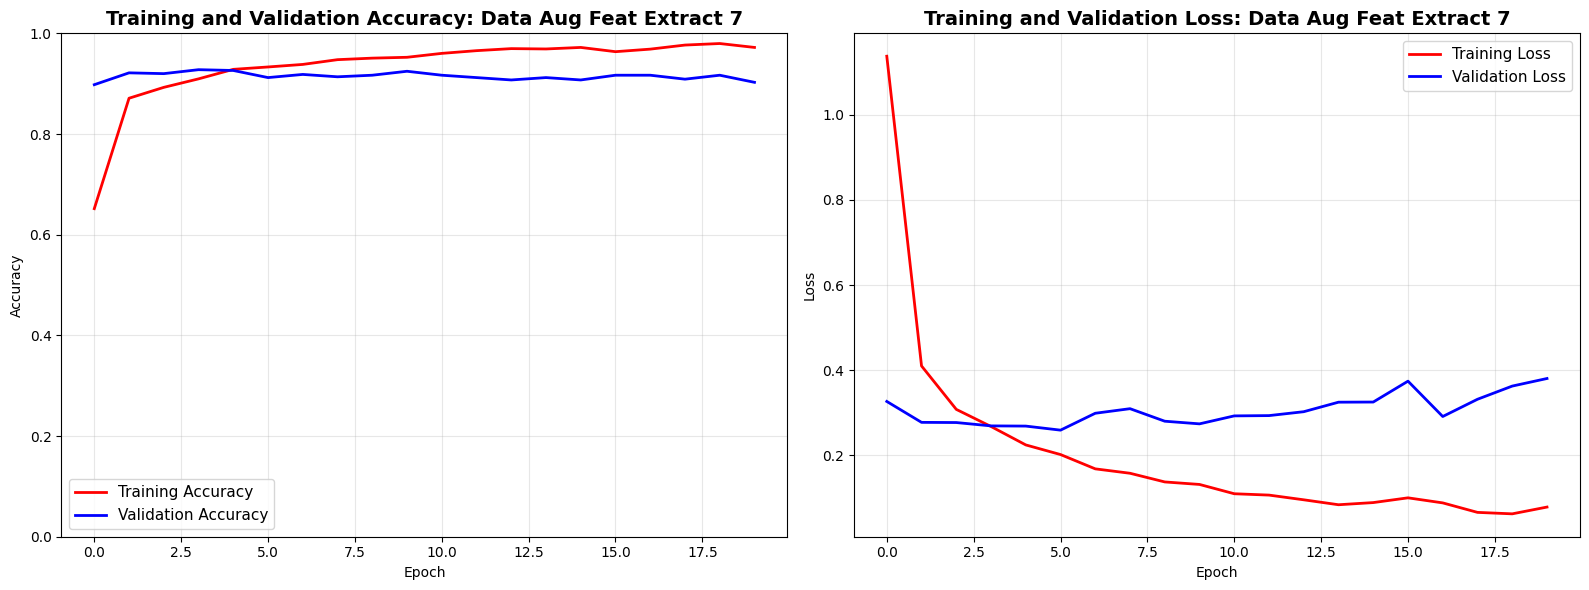


  Training Summary
  Best Training Accuracy:   0.9798
  Best Validation Accuracy: 0.9278
  Final Training Accuracy:  0.9720
  Final Validation Accuracy:0.9027
  Accuracy Gap (final): 0.0693


In [10]:
# visualizat data aug best
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy plot
ax1.plot(epochs_range, acc, 'r-', linewidth=2, label="Training Accuracy")
ax1.plot(epochs_range, val_acc, 'b-', linewidth=2, label="Validation Accuracy")
ax1.set_title('Training and Validation Accuracy: Data Aug Feat Extract 7', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(fontsize=11); ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# Loss plot
ax2.plot(epochs_range, loss, 'r-', linewidth=2, label="Training Loss")
ax2.plot(epochs_range, val_loss, 'b-', linewidth=2, label="Validation Loss")
ax2.set_title('Training and Validation Loss: Data Aug Feat Extract 7', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(fontsize=11); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Stats printout
print(f"\n{'='*60}")
print("  Training Summary")
print(f"{'='*60}")
print(f"  Best Training Accuracy:   {max(acc):.4f}")
print(f"  Best Validation Accuracy: {max(val_acc):.4f}")
print(f"  Final Training Accuracy:  {acc[-1]:.4f}")
print(f"  Final Validation Accuracy:{val_acc[-1]:.4f}")
print(f"  Accuracy Gap (final): {abs(acc[-1] - val_acc[-1]):.4f}")

In [11]:
# Evaluation
import numpy as np
import seaborn as sns

# Evaluate on test set
print("Evaluating on test set...")
test_loss, test_accuracy =ResNet50_model.evaluate(test_ds, verbose=0)
print(f"Test Loss (Data Aug Feat Extract 7 (Pre transfer learning)): {test_loss:.4f}")
print(f"Test Accuracy (Data Aug Feat Extract 7 (Pre transfer learning)): {test_accuracy:.4f}")

Evaluating on test set...
Test Loss (Data Aug Feat Extract 7 (Pre transfer learning)): 0.3582
Test Accuracy (Data Aug Feat Extract 7 (Pre transfer learning)): 0.9177


21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 296ms/step


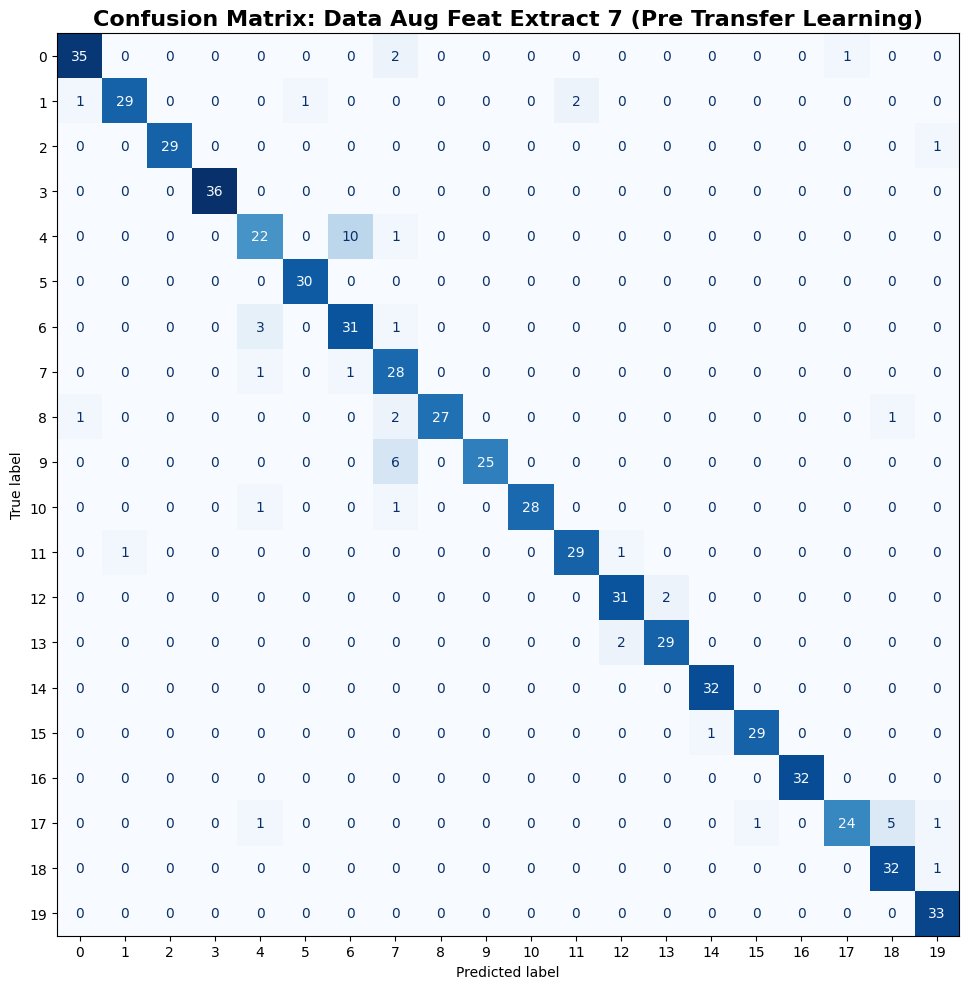

In [12]:
# confusion matrix visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# need lables first
y_true_labels = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = ResNet50_model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# to plot
fig, ax = plt.subplots(figsize=(12, 10))
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Blues', ax=ax, colorbar=False)
ax.set_title('Confusion Matrix: Data Aug Feat Extract 7 (Pre Transfer Learning)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Test accuracy went down. Try a different data augmentation technique then. Will move onto trying brightness.

In [7]:
# data augmentation using pytorch
from torchvision import datasets, transforms
from  keras import Sequential
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomContrast , RandomTranslation, RandomBrightness
from keras.utils import set_random_seed

set_random_seed(42)

# data augmentation

data_augment_feat8= Sequential([
    RandomFlip("horizontal"), # random horizontal flip
    RandomRotation(0.01), # random rotation - smaller value to prevent over rotating
    RandomZoom(0.02), # less intense zoom
    RandomBrightness(0.05) # random brightness
])



# train gets augmentations
train_data_aug_feat8 = train_ds.map(lambda x, y: (data_augment_feat8(preprocess_input(x)), y))

# validation and test only normalized
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

In [8]:
from tensorflow.keras import layers, optimizers, models
import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
# for ResNet50
from keras.applications import ResNet50
from keras.models import Model

# load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', # want to use pretrained image weights
                      include_top=False, # do not want to use original head, use custom below
                      # also allows for feature extraction
                      input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False # for feature extraction

# creating own cutstom head
X = base_model.output
X = GlobalAveragePooling2D()(X)
X = Dropout(0.3)(X)
X = Dense(128, activation='relu')(X)
X = Dropout(0.2)(X)

# need to add softmax layer for the number of classes (20 being used)
predictions = Dense(20, activation = 'softmax')(X)

# create the final model
ResNet50_model = Model(inputs = base_model.input, outputs = predictions)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# compile model
ResNet50_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# now fit and train the model
history = ResNet50_model.fit(
    train_data_aug_feat8,
    validation_data = val_ds,
    epochs = 20,
    verbose = 1
)

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 70s 587ms/step - accuracy: 0.2875 - loss: 2.5342 - val_accuracy: 0.7991 - val_loss: 0.6554
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 438ms/step - accuracy: 0.6313 - loss: 1.1635 - val_accuracy: 0.8571 - val_loss: 0.4487
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 445ms/step - accuracy: 0.6943 - loss: 0.9376 - val_accuracy: 0.8603 - val_loss: 0.3932
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 443ms/step - accuracy: 0.7305 - loss: 0.8088 - val_accuracy: 0.8681 - val_loss: 0.3638
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 44s 473ms/step - accuracy: 0.7602 - loss: 0.7288 - val_accuracy: 0.8713 - val_loss: 0.3854
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 79s 439ms/step - accuracy: 0.7819 - loss: 0.6510 - val_accuracy: 0.8760 - val_loss: 0.3566
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 442ms/step - accuracy: 0.8051 - loss: 0.5990 - val_accuracy: 0.8713 - val_loss: 0.3493
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 82s 444ms/step - accuracy: 0.8145 - loss: 0.5776 - val_accu

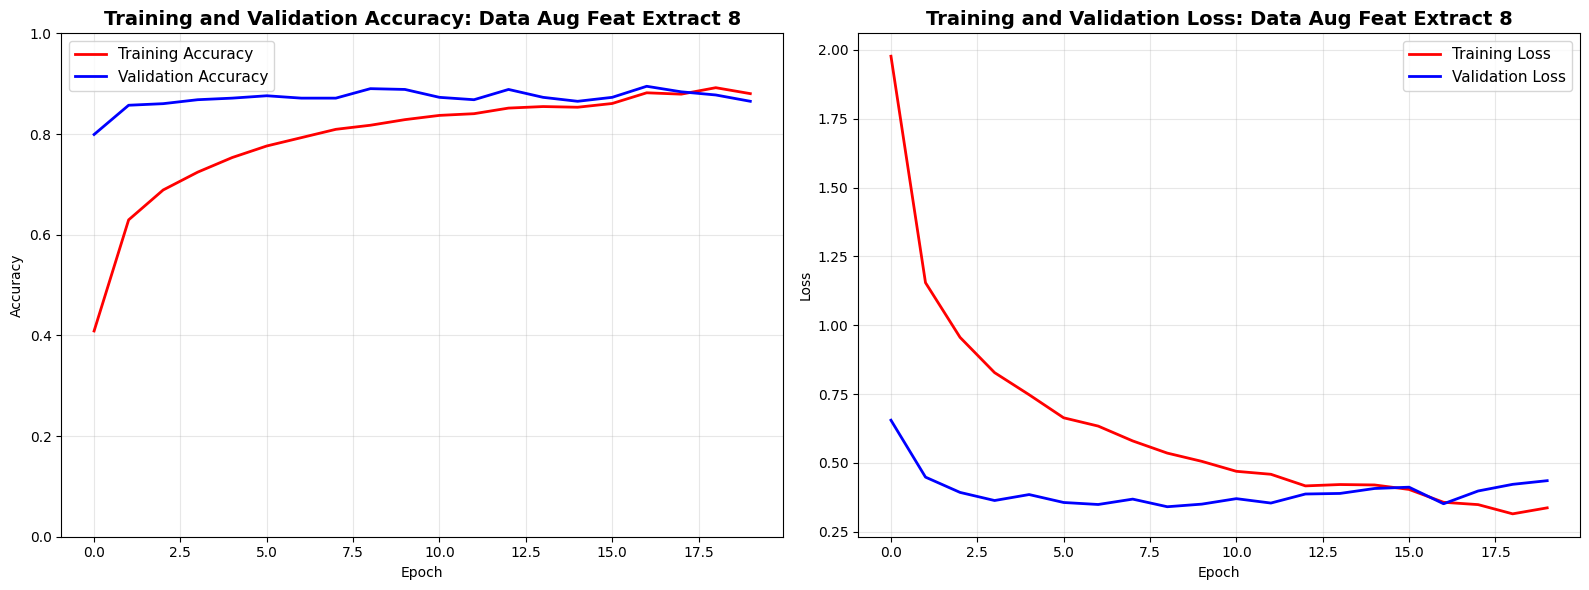


  Training Summary
  Best Training Accuracy:   0.8920
  Best Validation Accuracy: 0.8948
  Final Training Accuracy:  0.8802
  Final Validation Accuracy:0.8650
  Accuracy Gap (final): 0.0152


In [10]:
# visualizat data aug best
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy plot
ax1.plot(epochs_range, acc, 'r-', linewidth=2, label="Training Accuracy")
ax1.plot(epochs_range, val_acc, 'b-', linewidth=2, label="Validation Accuracy")
ax1.set_title('Training and Validation Accuracy: Data Aug Feat Extract 8', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(fontsize=11); ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# Loss plot
ax2.plot(epochs_range, loss, 'r-', linewidth=2, label="Training Loss")
ax2.plot(epochs_range, val_loss, 'b-', linewidth=2, label="Validation Loss")
ax2.set_title('Training and Validation Loss: Data Aug Feat Extract 8', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(fontsize=11); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Stats printout
print(f"\n{'='*60}")
print("  Training Summary")
print(f"{'='*60}")
print(f"  Best Training Accuracy:   {max(acc):.4f}")
print(f"  Best Validation Accuracy: {max(val_acc):.4f}")
print(f"  Final Training Accuracy:  {acc[-1]:.4f}")
print(f"  Final Validation Accuracy:{val_acc[-1]:.4f}")
print(f"  Accuracy Gap (final): {abs(acc[-1] - val_acc[-1]):.4f}")

In [11]:
# Evaluation
import numpy as np
import seaborn as sns

# Evaluate on test set
print("Evaluating on test set...")
test_loss, test_accuracy =ResNet50_model.evaluate(test_ds, verbose=0)
print(f"Test Loss (Data Aug Feat Extract 8 (Pre transfer learning)): {test_loss:.4f}")
print(f"Test Accuracy (Data Aug Feat Extract 8 (Pre transfer learning)): {test_accuracy:.4f}")

Evaluating on test set...
Test Loss (Data Aug Feat Extract 8 (Pre transfer learning)): 0.4394
Test Accuracy (Data Aug Feat Extract 8 (Pre transfer learning)): 0.8556


21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 259ms/step


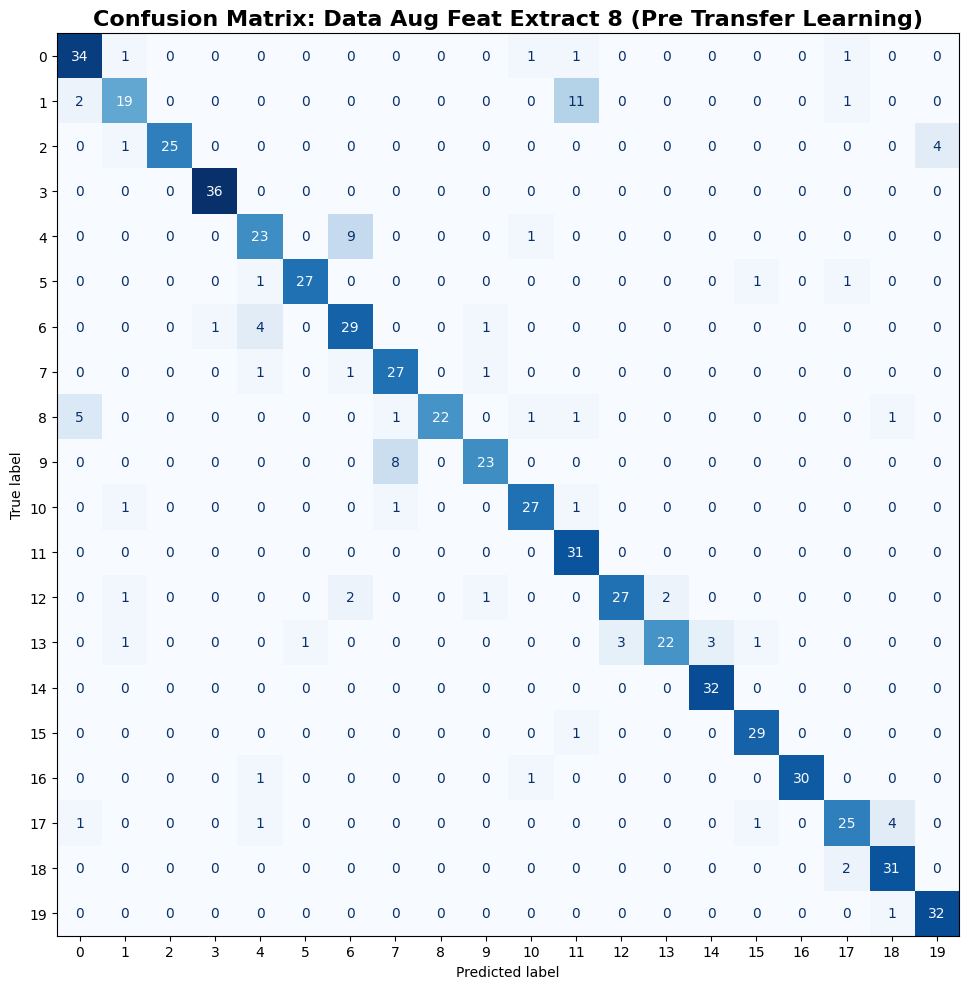

In [12]:
# confusion matrix visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# need lables first
y_true_labels = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = ResNet50_model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# to plot
fig, ax = plt.subplots(figsize=(12, 10))
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Blues', ax=ax, colorbar=False)
ax.set_title('Confusion Matrix: Data Aug Feat Extract 8 (Pre Transfer Learning)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Test accuracy decreased even more. Take out brightness and try one more data augmentation technique. Try random vertical flip.

In [7]:
# data augmentation using pytorch
from torchvision import datasets, transforms
from  keras import Sequential
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomContrast , RandomTranslation, RandomBrightness
from keras.utils import set_random_seed

set_random_seed(42)

# data augmentation

data_augment_feat9= Sequential([
    RandomFlip("horizontal"), # random horizontal flip
    RandomRotation(0.01), # random rotation - smaller value to prevent over rotating
    RandomZoom(0.02), # less intense zoom
    RandomFlip("vertical") # random vertical flip
])



# train gets augmentations
train_data_aug_feat9 = train_ds.map(lambda x, y: (data_augment_feat9(preprocess_input(x)), y))

# validation and test only normalized
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

In [8]:
from tensorflow.keras import layers, optimizers, models
import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
# for ResNet50
from keras.applications import ResNet50
from keras.models import Model

# load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', # want to use pretrained image weights
                      include_top=False, # do not want to use original head, use custom below
                      # also allows for feature extraction
                      input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False # for feature extraction

# creating own cutstom head
X = base_model.output
X = GlobalAveragePooling2D()(X)
X = Dropout(0.3)(X)
X = Dense(128, activation='relu')(X)
X = Dropout(0.2)(X)

# need to add softmax layer for the number of classes (20 being used)
predictions = Dense(20, activation = 'softmax')(X)

# create the final model
ResNet50_model = Model(inputs = base_model.input, outputs = predictions)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# compile model
ResNet50_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# now fit and train the model
history = ResNet50_model.fit(
    train_data_aug_feat9,
    validation_data = val_ds,
    epochs = 20,
    verbose = 1
)

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 75s 643ms/step - accuracy: 0.3373 - loss: 2.3263 - val_accuracy: 0.8587 - val_loss: 0.4489
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 45s 481ms/step - accuracy: 0.6943 - loss: 0.9379 - val_accuracy: 0.9042 - val_loss: 0.3273
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 45s 482ms/step - accuracy: 0.7533 - loss: 0.7201 - val_accuracy: 0.8964 - val_loss: 0.3370
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 45s 479ms/step - accuracy: 0.7901 - loss: 0.6527 - val_accuracy: 0.8917 - val_loss: 0.3106
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 45s 477ms/step - accuracy: 0.8061 - loss: 0.5857 - val_accuracy: 0.9231 - val_loss: 0.2932
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 44s 469ms/step - accuracy: 0.8307 - loss: 0.5187 - val_accuracy: 0.9042 - val_loss: 0.3089
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 45s 473ms/step - accuracy: 0.8567 - loss: 0.4505 - val_accuracy: 0.9011 - val_loss: 0.3186
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 45s 478ms/step - accuracy: 0.8515 - loss: 0.4495 - val_accu

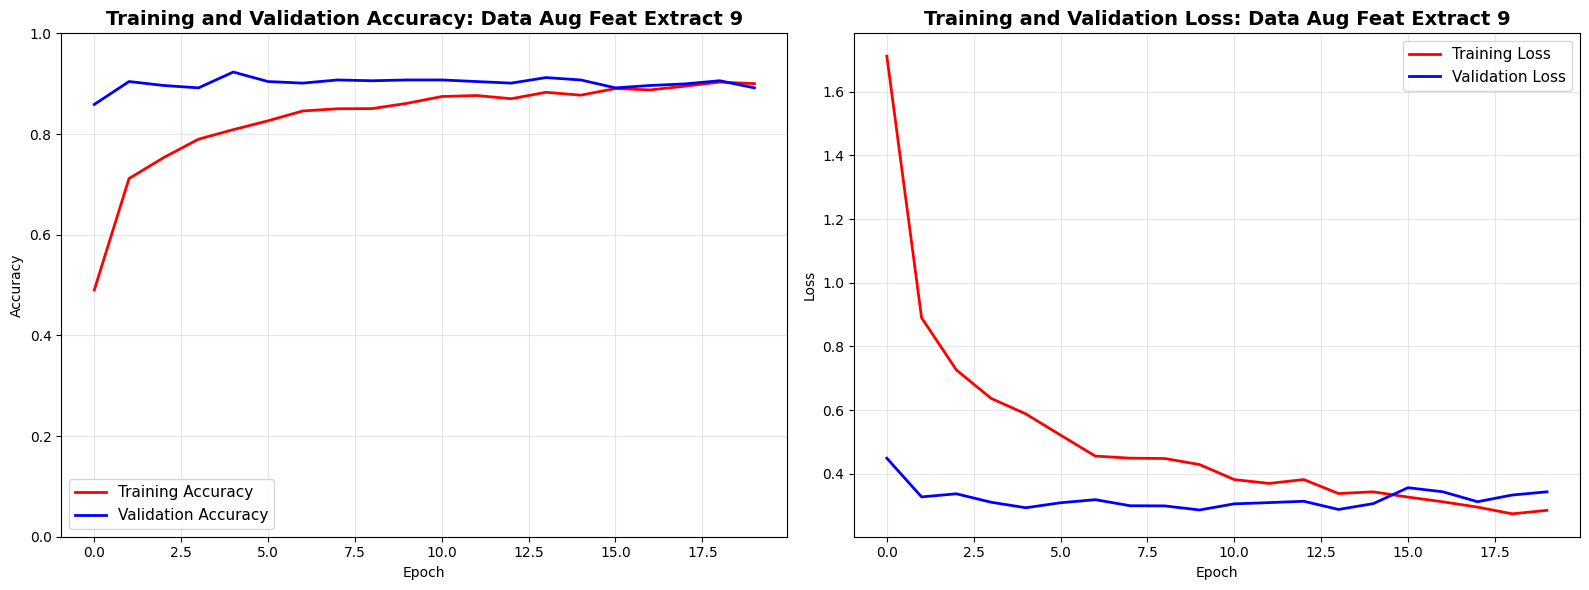


  Training Summary
  Best Training Accuracy:   0.9031
  Best Validation Accuracy: 0.9231
  Final Training Accuracy:  0.9001
  Final Validation Accuracy:0.8917
  Accuracy Gap (final): 0.0084


In [10]:
# visualizat data aug best
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy plot
ax1.plot(epochs_range, acc, 'r-', linewidth=2, label="Training Accuracy")
ax1.plot(epochs_range, val_acc, 'b-', linewidth=2, label="Validation Accuracy")
ax1.set_title('Training and Validation Accuracy: Data Aug Feat Extract 9', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(fontsize=11); ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# Loss plot
ax2.plot(epochs_range, loss, 'r-', linewidth=2, label="Training Loss")
ax2.plot(epochs_range, val_loss, 'b-', linewidth=2, label="Validation Loss")
ax2.set_title('Training and Validation Loss: Data Aug Feat Extract 9', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(fontsize=11); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Stats printout
print(f"\n{'='*60}")
print("  Training Summary")
print(f"{'='*60}")
print(f"  Best Training Accuracy:   {max(acc):.4f}")
print(f"  Best Validation Accuracy: {max(val_acc):.4f}")
print(f"  Final Training Accuracy:  {acc[-1]:.4f}")
print(f"  Final Validation Accuracy:{val_acc[-1]:.4f}")
print(f"  Accuracy Gap (final): {abs(acc[-1] - val_acc[-1]):.4f}")

In [12]:
# Evaluation
import numpy as np
import seaborn as sns

# Evaluate on test set
print("Evaluating on test set...")
test_loss, test_accuracy =ResNet50_model.evaluate(test_ds, verbose=0)
print(f"Test Loss (Data Aug Feat Extract 9 (Pre transfer learning)): {test_loss:.4f}")
print(f"Test Accuracy (Data Aug Feat Extract 9 (Pre transfer learning)): {test_accuracy:.4f}")

Evaluating on test set...
Test Loss (Data Aug Feat Extract 9 (Pre transfer learning)): 0.2761
Test Accuracy (Data Aug Feat Extract 9 (Pre transfer learning)): 0.9146


21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 259ms/step


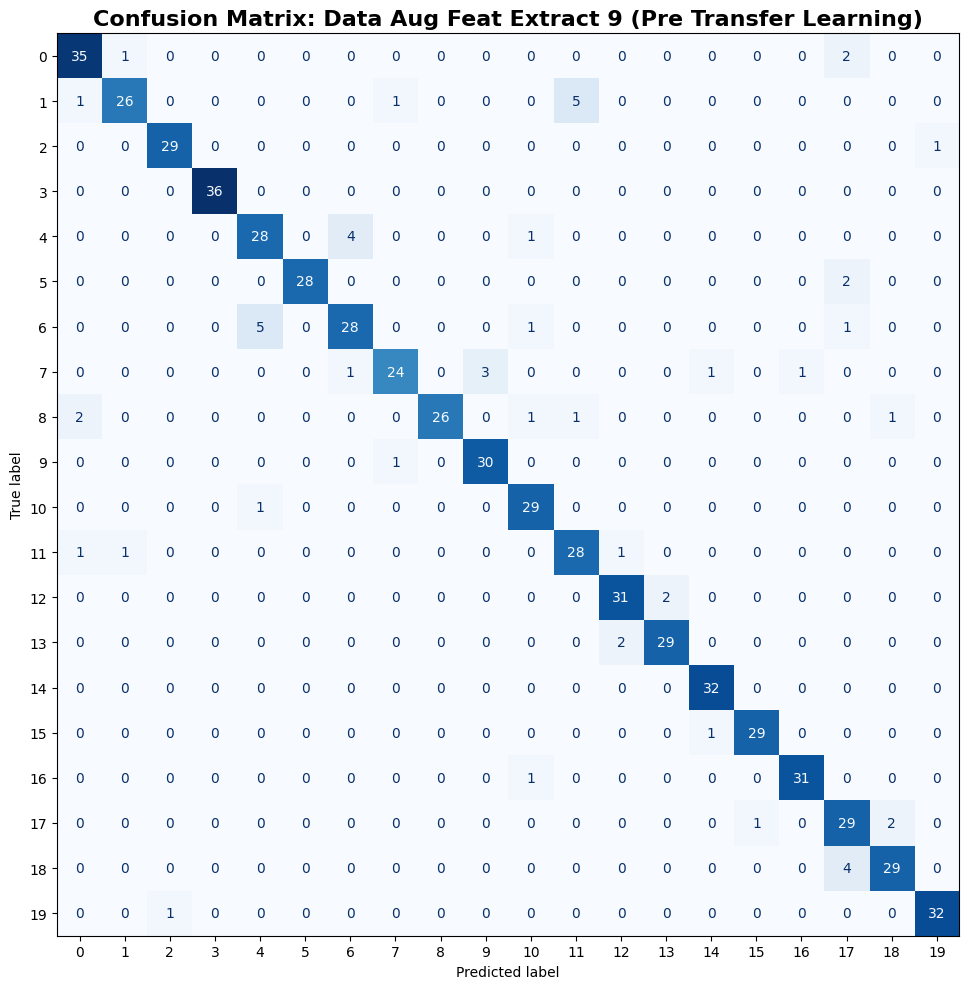

In [13]:
# confusion matrix visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# need lables first
y_true_labels = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = ResNet50_model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# to plot
fig, ax = plt.subplots(figsize=(12, 10))
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Blues', ax=ax, colorbar=False)
ax.set_title('Confusion Matrix: Data Aug Feat Extract 9 (Pre Transfer Learning)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Test Accuracy improved, but not the best. Now add in early stopping and Reduced LR to see if performs improves to the best data augmentation technique.

In [7]:
# data augmentation using pytorch
from torchvision import datasets, transforms
from  keras import Sequential
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomContrast , RandomTranslation, RandomBrightness
from keras.utils import set_random_seed

set_random_seed(42)

# data augmentation

data_augment_feat_best= Sequential([
    RandomFlip("horizontal"), # random horizontal flip
    RandomRotation(0.01), # random rotation - smaller value to prevent over rotating
    RandomZoom(0.02), # less intense zoom
])



# train gets augmentations
train_data_aug_feat_best = train_ds.map(lambda x, y: (data_augment_feat_best(preprocess_input(x)), y))

# validation and test only normalized
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

In [8]:
from tensorflow.keras import layers, optimizers, models
import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
# for ResNet50
from keras.applications import ResNet50
from keras.models import Model

# load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', # want to use pretrained image weights
                      include_top=False, # do not want to use original head, use custom below
                      # also allows for feature extraction
                      input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False # for feature extraction

# creating own cutstom head
X = base_model.output
X = GlobalAveragePooling2D()(X)
X = Dropout(0.3)(X)
X = Dense(128, activation='relu')(X)
X = Dropout(0.2)(X)

# need to add softmax layer for the number of classes (20 being used)
predictions = Dense(20, activation = 'softmax')(X)

# create the final model
ResNet50_model = Model(inputs = base_model.input, outputs = predictions)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
# compile model
ResNet50_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# add in callbacks
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# now fit and train the model
history = ResNet50_model.fit(
    train_data_aug_feat_best,
    validation_data = val_ds,
    epochs = 20,
    callbacks = [early_stopping, reduce_lr],
    verbose = 1
)

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 75s 609ms/step - accuracy: 0.9539 - loss: 0.1275 - val_accuracy: 0.8995 - val_loss: 0.3611 - learning_rate: 0.0010
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 448ms/step - accuracy: 0.9604 - loss: 0.1245 - val_accuracy: 0.9074 - val_loss: 0.3053 - learning_rate: 0.0010
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 43s 461ms/step - accuracy: 0.9574 - loss: 0.1250 - val_accuracy: 0.9168 - val_loss: 0.3168 - learning_rate: 0.0010
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 81s 449ms/step - accuracy: 0.9746 - loss: 0.0840 - val_accuracy: 0.9074 - val_loss: 0.3199 - learning_rate: 0.0010
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 447ms/step - accuracy: 0.9708 - loss: 0.0803 - val_accuracy: 0.9121 - val_loss: 0.3363 - learning_rate: 0.0010
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 454ms/step - accuracy: 0.9760 - loss: 0.0643 - val_accuracy: 0.9168 - val_loss: 0.2870 - learning_rate: 2.0000e-04
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 446ms/step - accuracy: 0.9806 - loss

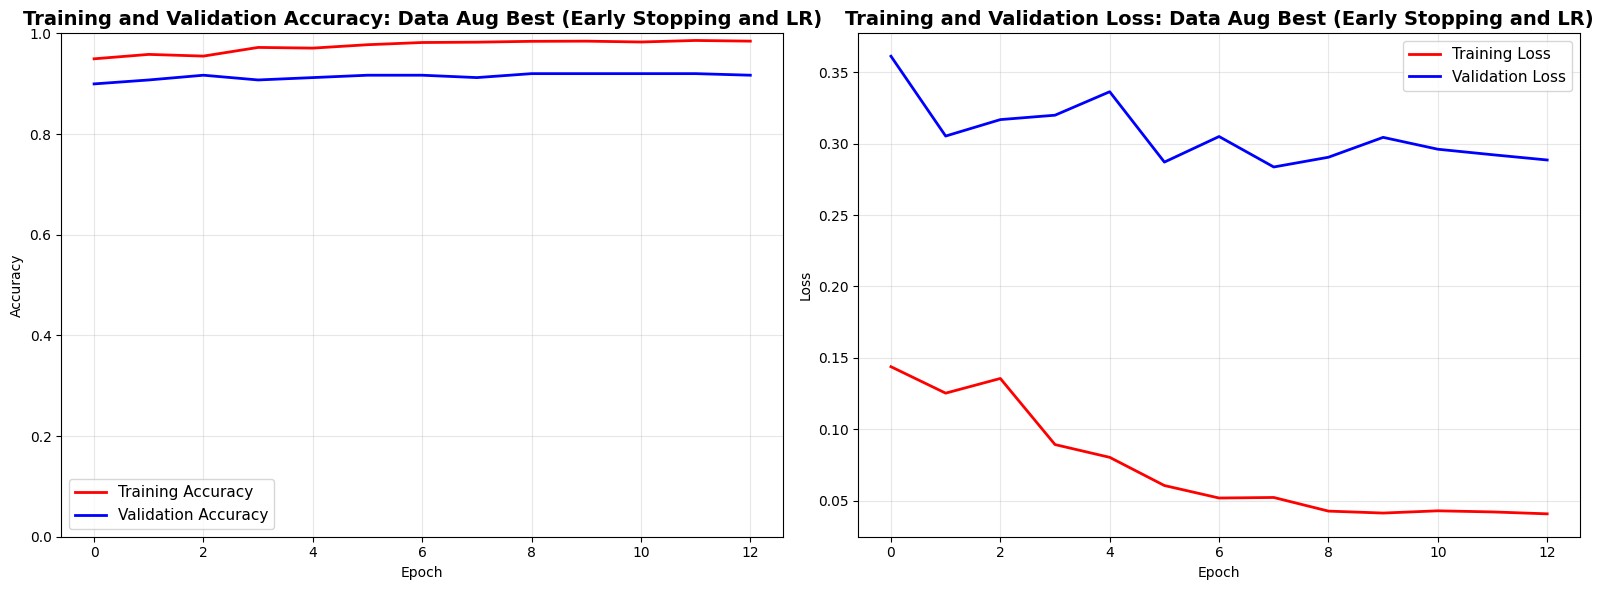


  Training Summary
  Best Training Accuracy:   0.9858
  Best Validation Accuracy: 0.9199
  Final Training Accuracy:  0.9845
  Final Validation Accuracy:0.9168
  Accuracy Gap (final): 0.0677


In [11]:
# visualizat data aug best
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy plot
ax1.plot(epochs_range, acc, 'r-', linewidth=2, label="Training Accuracy")
ax1.plot(epochs_range, val_acc, 'b-', linewidth=2, label="Validation Accuracy")
ax1.set_title('Training and Validation Accuracy: Data Aug Best (Early Stopping and LR)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(fontsize=11); ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# Loss plot
ax2.plot(epochs_range, loss, 'r-', linewidth=2, label="Training Loss")
ax2.plot(epochs_range, val_loss, 'b-', linewidth=2, label="Validation Loss")
ax2.set_title('Training and Validation Loss: Data Aug Best (Early Stopping and LR)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(fontsize=11); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Stats printout
print(f"\n{'='*60}")
print("  Training Summary")
print(f"{'='*60}")
print(f"  Best Training Accuracy:   {max(acc):.4f}")
print(f"  Best Validation Accuracy: {max(val_acc):.4f}")
print(f"  Final Training Accuracy:  {acc[-1]:.4f}")
print(f"  Final Validation Accuracy:{val_acc[-1]:.4f}")
print(f"  Accuracy Gap (final): {abs(acc[-1] - val_acc[-1]):.4f}")

In [12]:
# Evaluation
import numpy as np
import seaborn as sns

# Evaluate on test set
print("Evaluating on test set...")
test_loss, test_accuracy =ResNet50_model.evaluate(test_ds, verbose=0)
print(f"Test Loss (Data Aug Feat Best (Early Stopping and LR) (Pre transfer learning)): {test_loss:.4f}")
print(f"Test Accuracy (Data Aug FeatBest (Early Stopping and LR)(Pre transfer learning)): {test_accuracy:.4f}")

Evaluating on test set...
Test Loss (Data Aug Feat Best (Early Stopping and LR) (Pre transfer learning)): 0.2789
Test Accuracy (Data Aug FeatBest (Early Stopping and LR)(Pre transfer learning)): 0.9161


21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 298ms/step


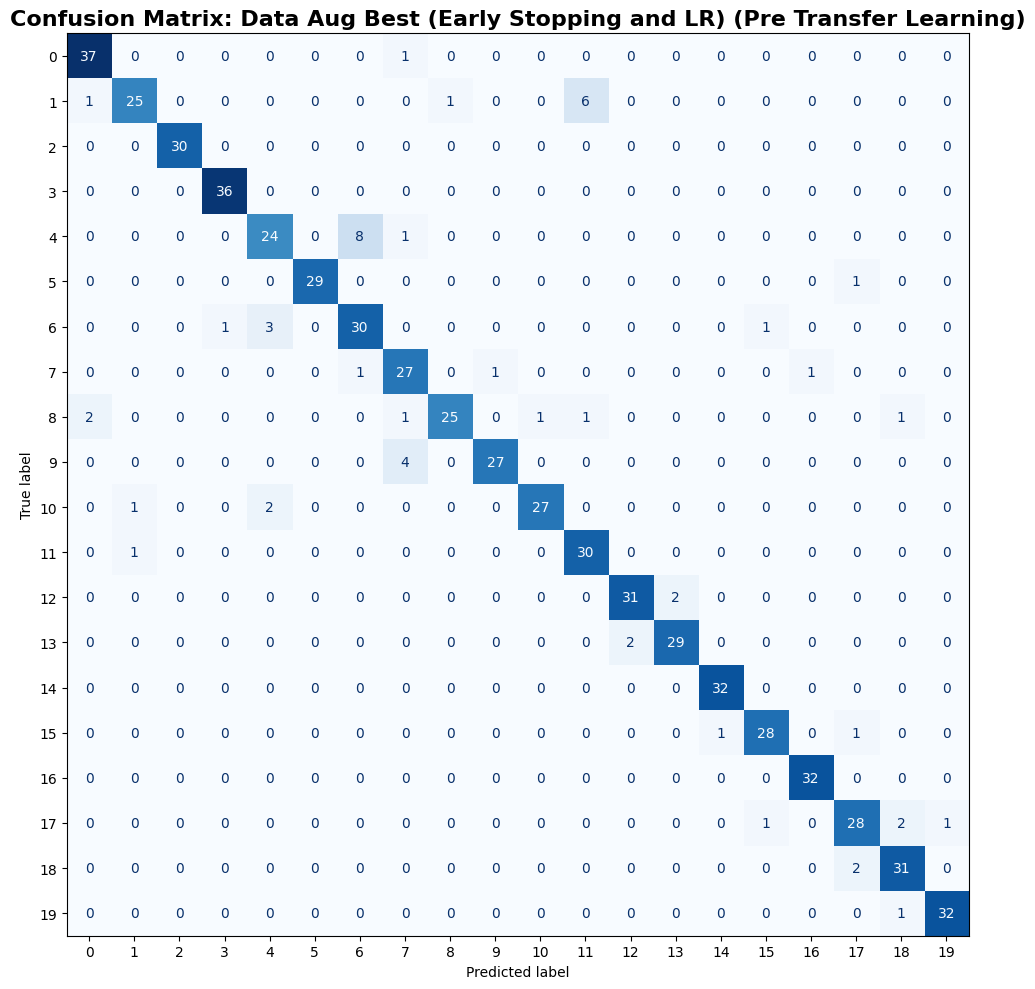

In [13]:
# confusion matrix visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# need lables first
y_true_labels = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = ResNet50_model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# to plot
fig, ax = plt.subplots(figsize=(12, 10))
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Blues', ax=ax, colorbar=False)
ax.set_title('Confusion Matrix: Data Aug Best (Early Stopping and LR) (Pre Transfer Learning)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**Now run the model with all layers before doing transfer learning**

In [7]:
# running best data augmentation model with all layers now

# data augmentation using pytorch
from torchvision import datasets, transforms
from  keras import Sequential
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomContrast , RandomTranslation, RandomBrightness
from keras.utils import set_random_seed

set_random_seed(42)

# data augmentation

data_augment_feat_best= Sequential([
    RandomFlip("horizontal"), # random horizontal flip
    RandomRotation(0.01), # random rotation - smaller value to prevent over rotating
    RandomZoom(0.02), # less intense zoom
])



# train gets augmentations
train_data_aug_feat_best = train_ds.map(lambda x, y: (data_augment_feat_best(preprocess_input(x)), y))

# validation and test only normalized
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

In [8]:
from tensorflow.keras import layers, optimizers, models
import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
# for ResNet50
from keras.applications import ResNet50
from keras.models import Model

# load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', # want to use pretrained image weights
                      include_top=False, # do not want to use original head, use custom below
                      # also allows for feature extraction
                      input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = True # CHANGED TO TRUE NOW!

# creating own cutstom head
X = base_model.output
X = GlobalAveragePooling2D()(X)
X = Dropout(0.3)(X)
X = Dense(128, activation='relu')(X)
X = Dropout(0.2)(X)

# need to add softmax layer for the number of classes (20 being used)
predictions = Dense(20, activation = 'softmax')(X)

# create the final model
ResNet50_model = Model(inputs = base_model.input, outputs = predictions)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# compile model
ResNet50_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


# now fit and train the model
history = ResNet50_model.fit(
    train_data_aug_feat_best,
    validation_data = val_ds,
    epochs = 20,
    verbose = 1
)

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 152s 973ms/step - accuracy: 0.1614 - loss: 2.9288 - val_accuracy: 0.0518 - val_loss: 15879.9902
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 56s 598ms/step - accuracy: 0.3091 - loss: 2.2112 - val_accuracy: 0.0706 - val_loss: 1161.1338
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 57s 614ms/step - accuracy: 0.4096 - loss: 1.8478 - val_accuracy: 0.0879 - val_loss: 316.3898
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 56s 604ms/step - accuracy: 0.4928 - loss: 1.5786 - val_accuracy: 0.0581 - val_loss: 26.1442
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 56s 599ms/step - accuracy: 0.5801 - loss: 1.3182 - val_accuracy: 0.4270 - val_loss: 2.4865
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 57s 608ms/step - accuracy: 0.6210 - loss: 1.1794 - val_accuracy: 0.3595 - val_loss: 2.9228
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 56s 592ms/step - accuracy: 0.6873 - loss: 0.9621 - val_accuracy: 0.4647 - val_loss: 2.0615
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 58s 624ms/step - accuracy: 0.7169 - loss: 0.8437

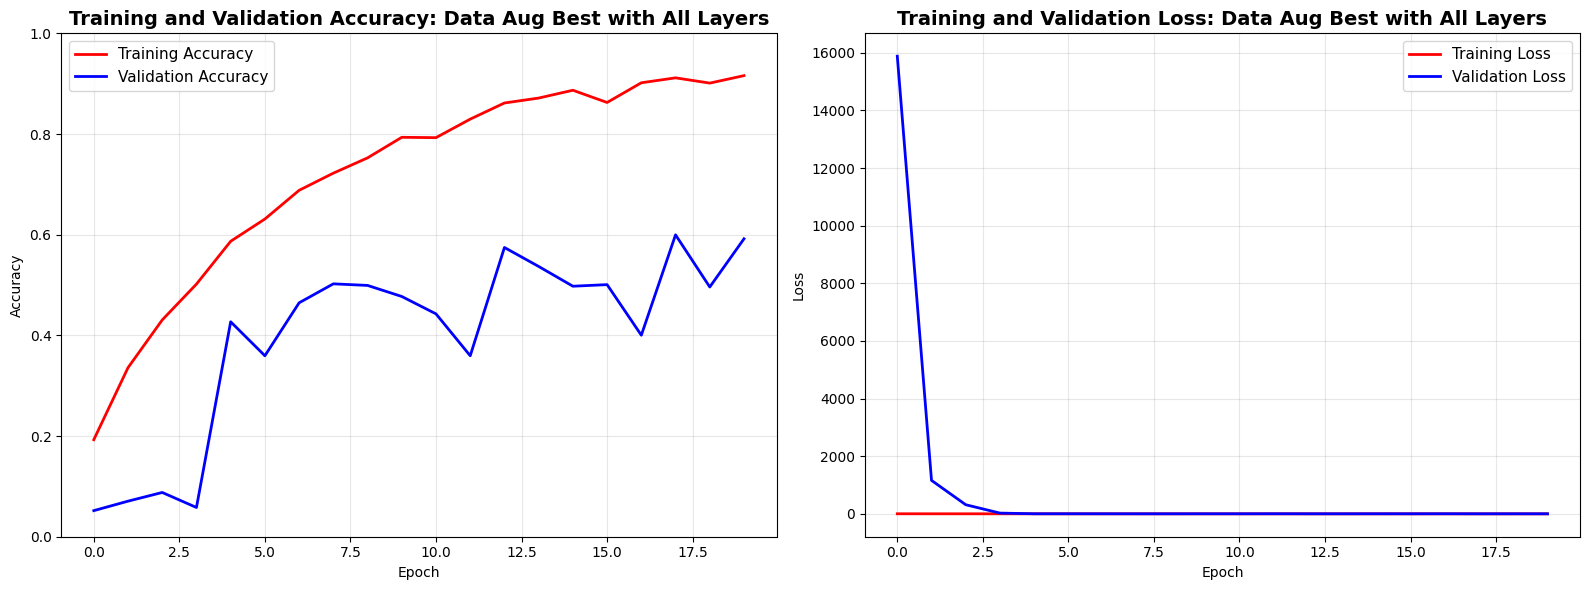


  Training Summary
  Best Training Accuracy:   0.9160
  Best Validation Accuracy: 0.5997
  Final Training Accuracy:  0.9160
  Final Validation Accuracy:0.5918
  Accuracy Gap (final): 0.3241


In [10]:
# visualizat data aug best
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy plot
ax1.plot(epochs_range, acc, 'r-', linewidth=2, label="Training Accuracy")
ax1.plot(epochs_range, val_acc, 'b-', linewidth=2, label="Validation Accuracy")
ax1.set_title('Training and Validation Accuracy: Data Aug Best with All Layers', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(fontsize=11); ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# Loss plot
ax2.plot(epochs_range, loss, 'r-', linewidth=2, label="Training Loss")
ax2.plot(epochs_range, val_loss, 'b-', linewidth=2, label="Validation Loss")
ax2.set_title('Training and Validation Loss: Data Aug Best with All Layers', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(fontsize=11); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Stats printout
print(f"\n{'='*60}")
print("  Training Summary")
print(f"{'='*60}")
print(f"  Best Training Accuracy:   {max(acc):.4f}")
print(f"  Best Validation Accuracy: {max(val_acc):.4f}")
print(f"  Final Training Accuracy:  {acc[-1]:.4f}")
print(f"  Final Validation Accuracy:{val_acc[-1]:.4f}")
print(f"  Accuracy Gap (final): {abs(acc[-1] - val_acc[-1]):.4f}")

In [11]:
# Evaluation
import numpy as np
import seaborn as sns

# Evaluate on test set
print("Evaluating on test set...")
test_loss, test_accuracy =ResNet50_model.evaluate(test_ds, verbose=0)
print(f"Test Loss (Data Aug Feat Best with All Layers: {test_loss:.4f}")
print(f"Test Accuracy (Data Aug Feat Extraction with All Layers: {test_accuracy:.4f}")

Evaluating on test set...
Test Loss (Data Aug Feat Best with All Layers: 1.7693
Test Accuracy (Data Aug Feat Extraction with All Layers: 0.5606


Model performs best when not all layers are trained and feature extraction is conducted.

21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 571ms/step


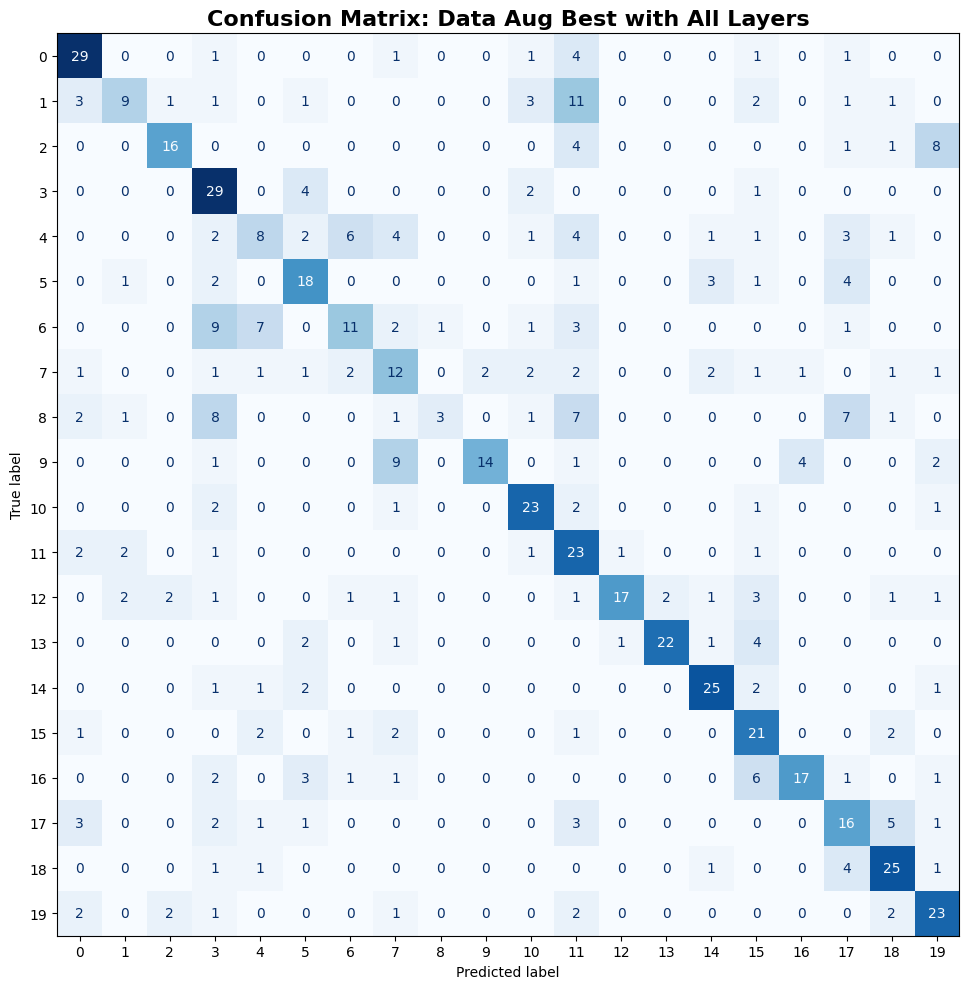

In [12]:
# confusion matrix visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# need lables first
y_true_labels = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = ResNet50_model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# to plot
fig, ax = plt.subplots(figsize=(12, 10))
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Blues', ax=ax, colorbar=False)
ax.set_title('Confusion Matrix: Data Aug Best with All Layers', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Run the model and do visualizations

**Transfer Learning Now**

In [11]:
# get best data aug first

from torchvision import datasets, transforms
from  keras import Sequential
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomContrast , RandomTranslation, RandomBrightness
from keras.utils import set_random_seed

set_random_seed(42)

# data augmentation

data_augment_feat_best= Sequential([
    RandomFlip("horizontal"), # random horizontal flip
    RandomRotation(0.01), # random rotation - smaller value to prevent over rotating
    RandomZoom(0.02), # less intense zoom
])



# train gets augmentations
train_data_aug_feat_best = train_ds.map(lambda x, y: (data_augment_feat_best(preprocess_input(x)), y))

# validation and test only normalized
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

from tensorflow.keras import layers, optimizers, models
import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
# for ResNet50
from keras.applications import ResNet50
from keras.models import Model

# load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', # want to use pretrained image weights
                      include_top=False, # do not want to use original head, use custom below
                      # also allows for feature extraction
                      input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False #freezing base for feature extraction

# creating own cutstom head
X = base_model.output
X = GlobalAveragePooling2D()(X)
X = Dropout(0.3)(X)
X = Dense(128, activation='relu')(X)
X = Dropout(0.2)(X)

# need to add softmax layer for the number of classes (20 being used)
predictions = Dense(20, activation = 'softmax')(X)

# create the final model
ResNet50_model = Model(inputs = base_model.input, outputs = predictions)


# compile model
ResNet50_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


# now fit and train the model
history = ResNet50_model.fit(
    train_data_aug_feat_best,
    validation_data = val_ds,
    epochs = 20,
    verbose = 1
)



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 70s 595ms/step - accuracy: 0.4902 - loss: 1.8380 - val_accuracy: 0.8823 - val_loss: 0.3563
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 439ms/step - accuracy: 0.8636 - loss: 0.4260 - val_accuracy: 0.8870 - val_loss: 0.3267
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 81s 427ms/step - accuracy: 0.8899 - loss: 0.3426 - val_accuracy: 0.9011 - val_loss: 0.3377
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 40s 433ms/step - accuracy: 0.9097 - loss: 0.2747 - val_accuracy: 0.9027 - val_loss: 0.2701
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 432ms/step - accuracy: 0.9248 - loss: 0.2173 - val_accuracy: 0.8980 - val_loss: 0.2889
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 441ms/step - accuracy: 0.9394 - loss: 0.1812 - val_accuracy: 0.9105 - val_loss: 0.3225
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 443ms/step - accuracy: 0.9446 - loss: 0.1575 - val_accuracy: 0.9074 - val_loss: 0.2851
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 443m

In [12]:
# now need to unfreeze part of the model, not everything

# make base trainable now
base_model.trainable = True


In [14]:
from keras.optimizers import Adam
# need to see how many layers in the base model

print("Number of layers in based model:", len(base_model.layers))

# there are 175 layers total,
  # begin fun tuning after 117 layers ~ 2/3 of layers
fine_tuning_layers = 117 # fine from this layer and after

# freeze all layers before 117th layer
for layer in base_model.layers[:fine_tuning_layers]:
  layer.trainable = False # this freezes all layers up until then

# compile the model now - same as before but with low learning rate for this stage
ResNet50_model.compile(
    optimizer = Adam(learning_rate = 1e-3),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# train the model now
# now fit and train the model
history = ResNet50_model.fit(
    train_data_aug_feat_best,
    validation_data = val_ds,
    epochs = 20,
    verbose = 1
)


Number of layers in based model: 175
Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 93s 688ms/step - accuracy: 0.6474 - loss: 1.3401 - val_accuracy: 0.4710 - val_loss: 3.1863
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 45s 478ms/step - accuracy: 0.8196 - loss: 0.5697 - val_accuracy: 0.6217 - val_loss: 1.7116
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 48s 513ms/step - accuracy: 0.8789 - loss: 0.4051 - val_accuracy: 0.6593 - val_loss: 1.4724
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 45s 476ms/step - accuracy: 0.8955 - loss: 0.3472 - val_accuracy: 0.6970 - val_loss: 2.3131
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 45s 482ms/step - accuracy: 0.9283 - loss: 0.2417 - val_accuracy: 0.7410 - val_loss: 0.9878
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 44s 473ms/step - accuracy: 0.9445 - loss: 0.1706 - val_accuracy: 0.7645 - val_loss: 0.9120
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 82s 475ms/step - accuracy: 0.9674 - loss: 0.1133 - val_accuracy: 0.7268 - val_loss: 1.1031
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 44s 468ms/step - accur

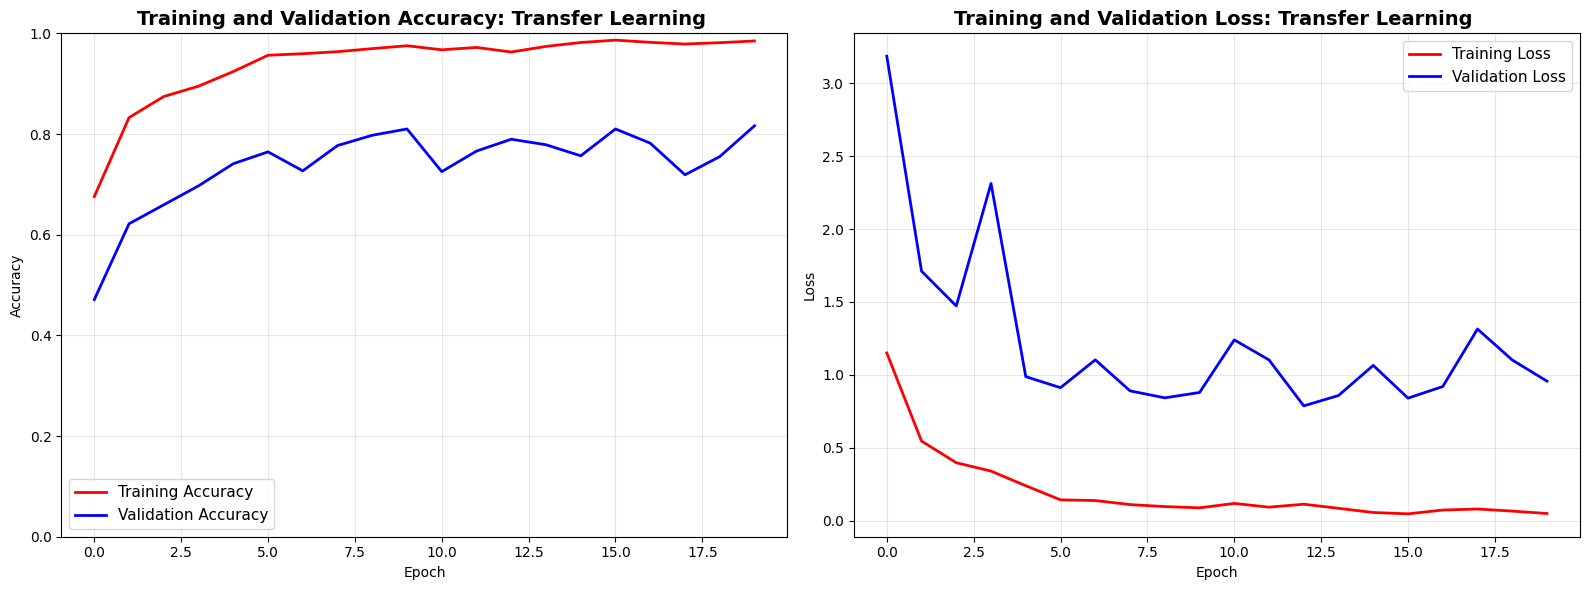


  Training Summary
  Best Training Accuracy:   0.9865
  Best Validation Accuracy: 0.8163
  Final Training Accuracy:  0.9848
  Final Validation Accuracy:0.8163
  Accuracy Gap (final): 0.1685


In [15]:
# visualizat data aug best
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy plot
ax1.plot(epochs_range, acc, 'r-', linewidth=2, label="Training Accuracy")
ax1.plot(epochs_range, val_acc, 'b-', linewidth=2, label="Validation Accuracy")
ax1.set_title('Training and Validation Accuracy: Transfer Learning ', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(fontsize=11); ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# Loss plot
ax2.plot(epochs_range, loss, 'r-', linewidth=2, label="Training Loss")
ax2.plot(epochs_range, val_loss, 'b-', linewidth=2, label="Validation Loss")
ax2.set_title('Training and Validation Loss: Transfer Learning ', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(fontsize=11); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Stats printout
print(f"\n{'='*60}")
print("  Training Summary")
print(f"{'='*60}")
print(f"  Best Training Accuracy:   {max(acc):.4f}")
print(f"  Best Validation Accuracy: {max(val_acc):.4f}")
print(f"  Final Training Accuracy:  {acc[-1]:.4f}")
print(f"  Final Validation Accuracy:{val_acc[-1]:.4f}")
print(f"  Accuracy Gap (final): {abs(acc[-1] - val_acc[-1]):.4f}")

In [18]:
# Evaluation
import numpy as np
import seaborn as sns

# Evaluate on test set
print("Evaluating on test set...")
test_loss, test_accuracy =ResNet50_model.evaluate(test_ds, verbose=0)
print(f"Test Loss (Transfer Learning): {test_loss:.4f}")
print(f"Test Accuracy (Transfer Learning): {test_accuracy:.4f}")

Evaluating on test set...
Test Loss (Transfer Learning): 0.7667
Test Accuracy (Transfer Learning): 0.8432


21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 302ms/step


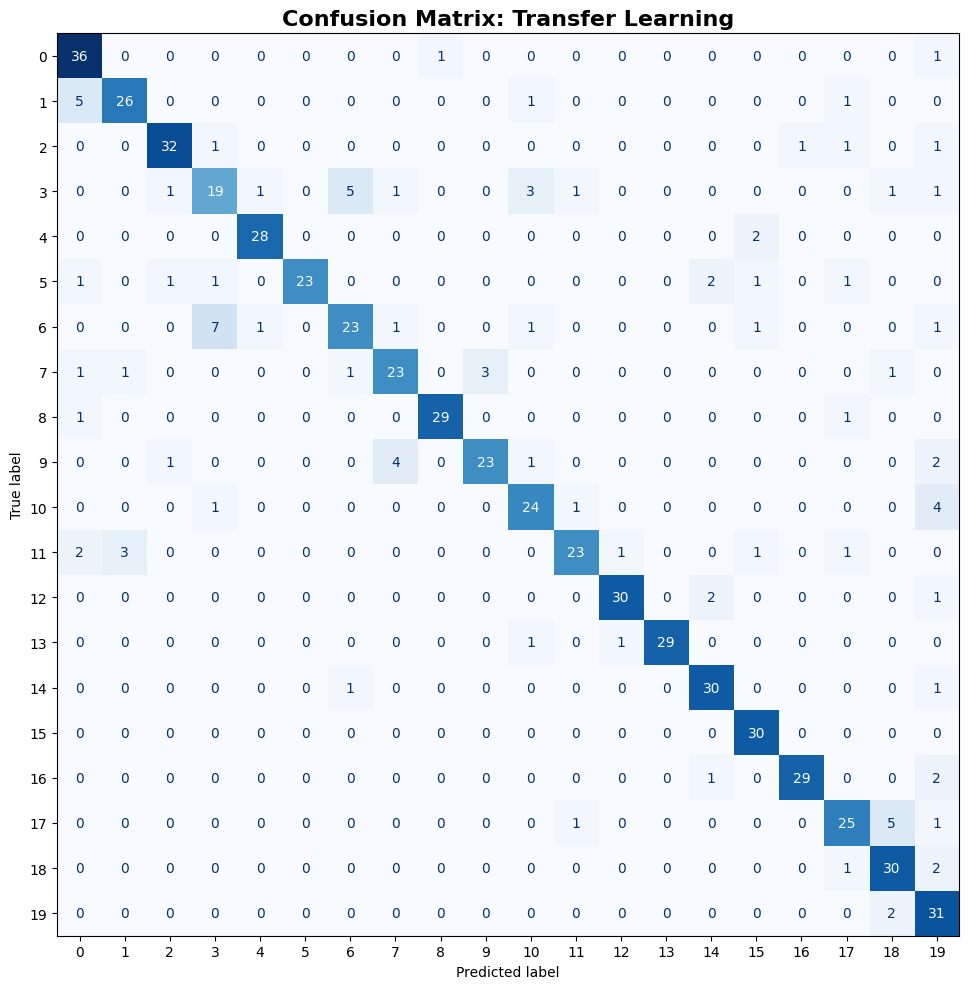

In [19]:
# confusion matrix visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# need lables first
y_true_labels = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = ResNet50_model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# to plot
fig, ax = plt.subplots(figsize=(12, 10))
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Blues', ax=ax, colorbar=False)
ax.set_title('Confusion Matrix: Transfer Learning', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Transfer Learning did not improrve test accuracy. Best model is therefore when feature extraction was done with data augmentaion of Random Horizontal Flip, Random Rotation (0.01) and Random Zoom (0.02) with a test accuracy of 92.08